<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#open and read raw SAT data file
raw_sat = ''
sat_file = 'sat_scores.csv'
with open(sat_file, 'r') as f:
    raw_sat = f.read()

In [3]:
#split SAT data into lines, split cells and float numbers
sat_clean = [[float(row[i]) if row[i].isdigit() else row[i] for i in range(len(row))]
             for row in [line.split(",") for line in raw_sat.splitlines()]]
sat_header = sat_clean[0]
sat_data = sat_clean[1:]

In [4]:
#create emtpy dictionary
sat_dict = {}
#call first row of data cells into dictionary as lists
for i in range(len(sat_data[0])):
    sat_dict[sat_header[i]] = [sat_data[0][i]]
#append remaining rows of data cells into dictionary lists
for row in range(len(sat_data)-1):    
    for i in range(len(sat_data[row])):
        sat_dict[sat_header[i]].append(sat_data[row+1][i])

In [5]:
#shorter method of creating dictionary for reference
#sat_dict = {sat_header[i]: [row[i] for row in sat_data] for i in range(len(sat_header))}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
#converting dictionary to pandas datframe
satdf1 = pd.DataFrame.from_dict(sat_dict)
satdf1.dtypes

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

In [7]:
#reading csv into pandas datframe
satdf = pd.read_csv(sat_file)
satdf.dtypes

#There is no difference as I have converted the column values to float in the dictionary

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [8]:
print type(satdf1)
print type(satdf)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
satdf.head(5)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data_dict = {State: {Type:}}

SyntaxError: invalid syntax (<ipython-input-10-78cae0f20692>, line 1)

In [11]:
satdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

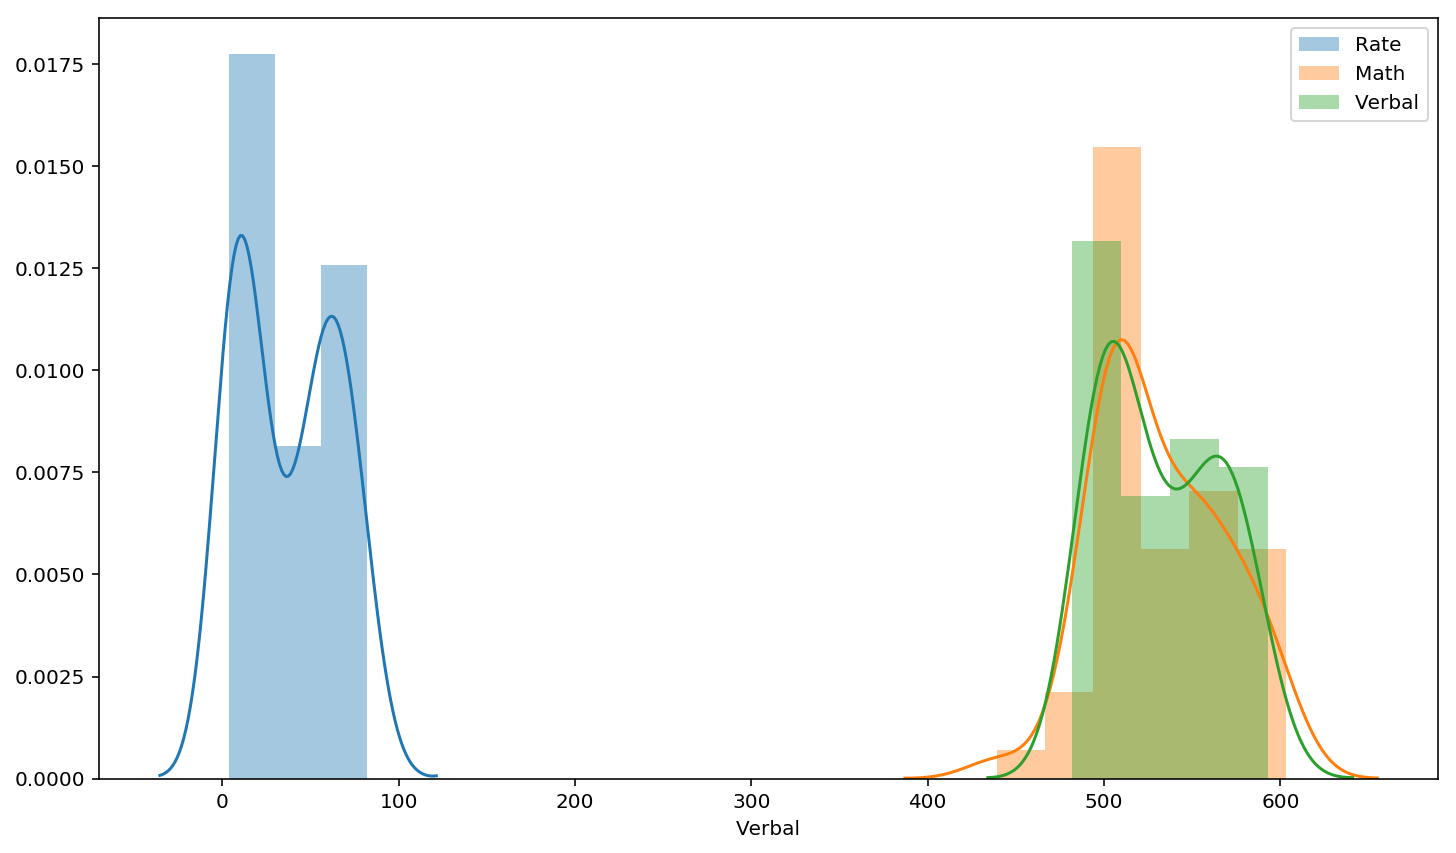

In [12]:
#set figure size for plot
plt.figure(figsize=(12,7))
#plot distribution for each variable
sns.distplot(satdf['Rate'], label='Rate')
sns.distplot(satdf['Math'], label='Math')
sns.distplot(satdf['Verbal'], label='Verbal')
#include legend
plt.legend()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

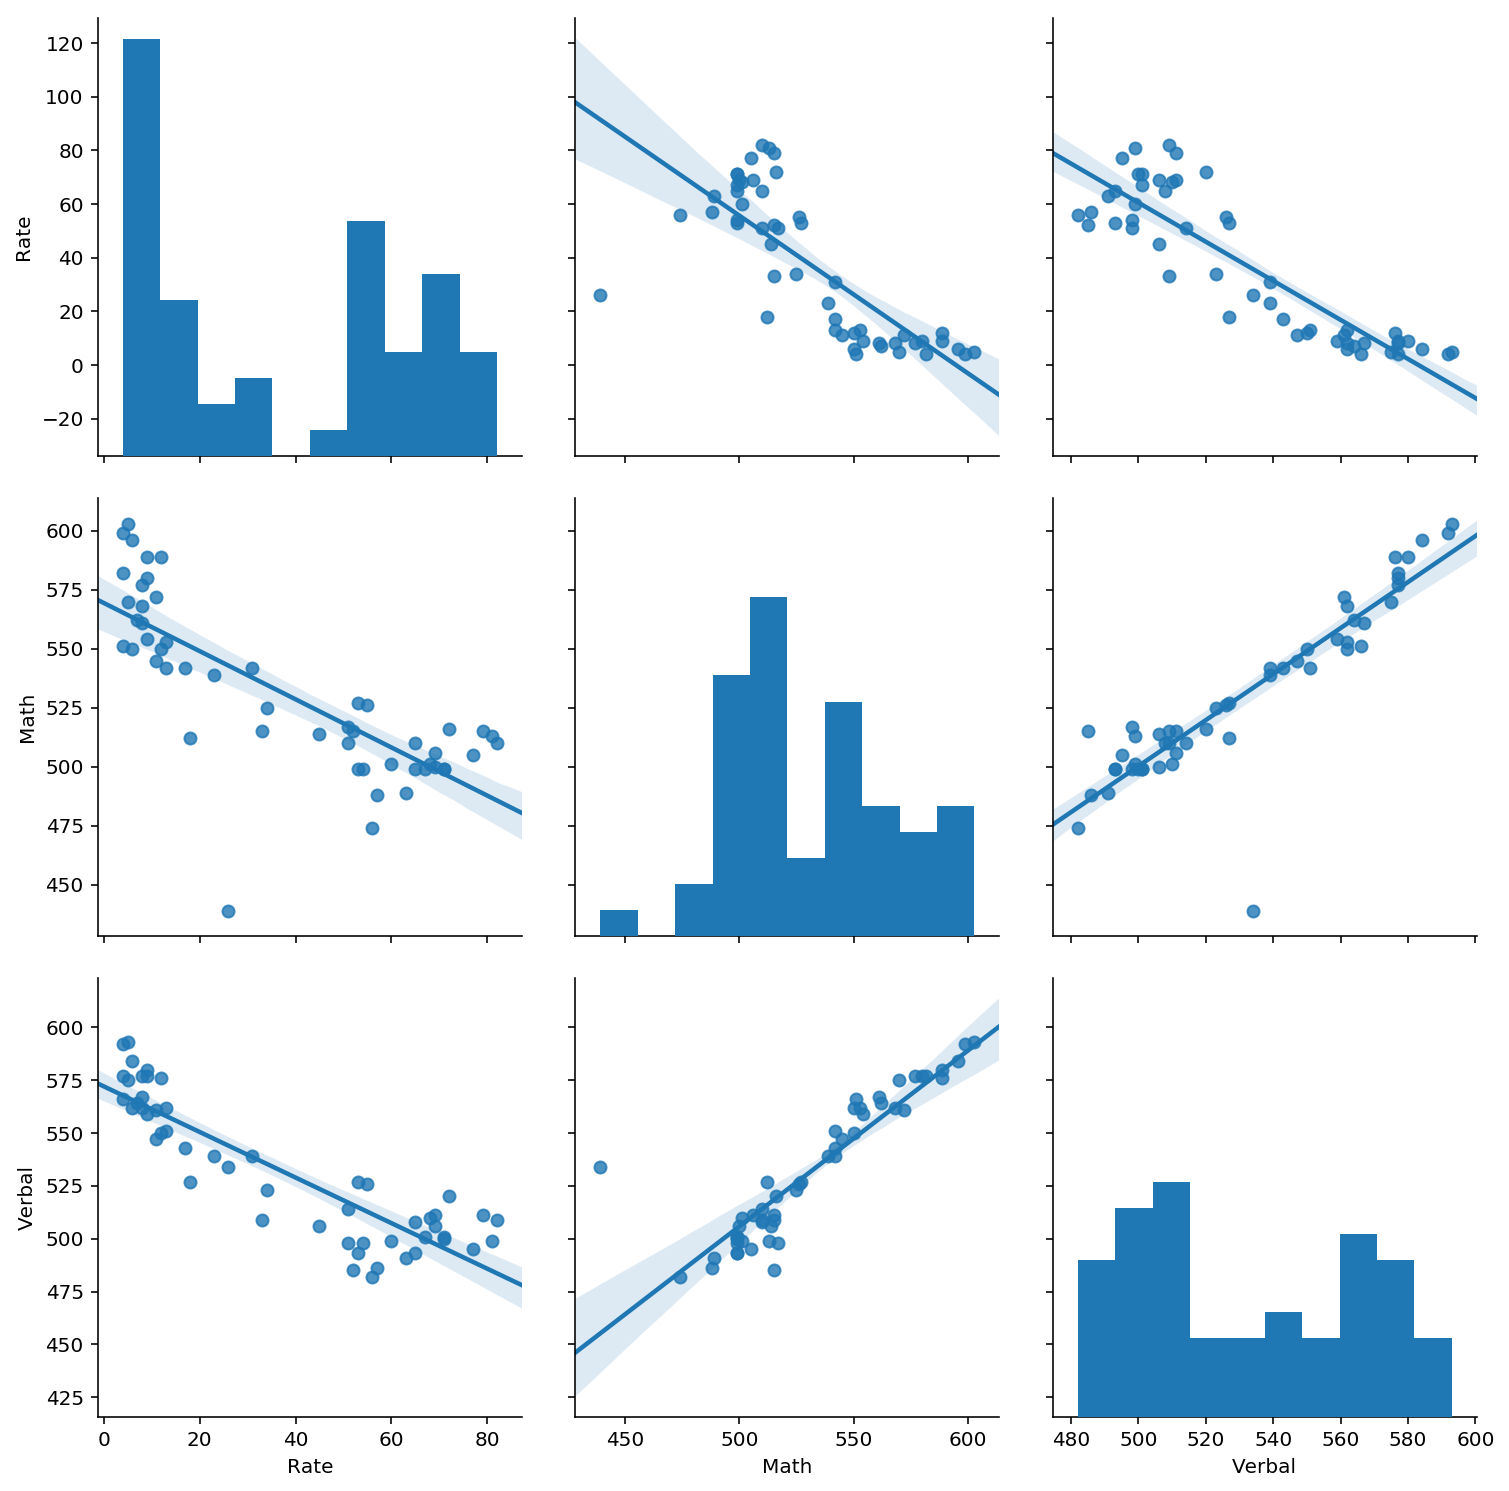

In [13]:
sns.pairplot(satdf[['Rate','Math','Verbal']], kind="reg", size=3.5)
#Math and Verbal scores are positively correlated
#Rate is negatively correlated with both Math and Verbal scores
#Each variable has different distribution form

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

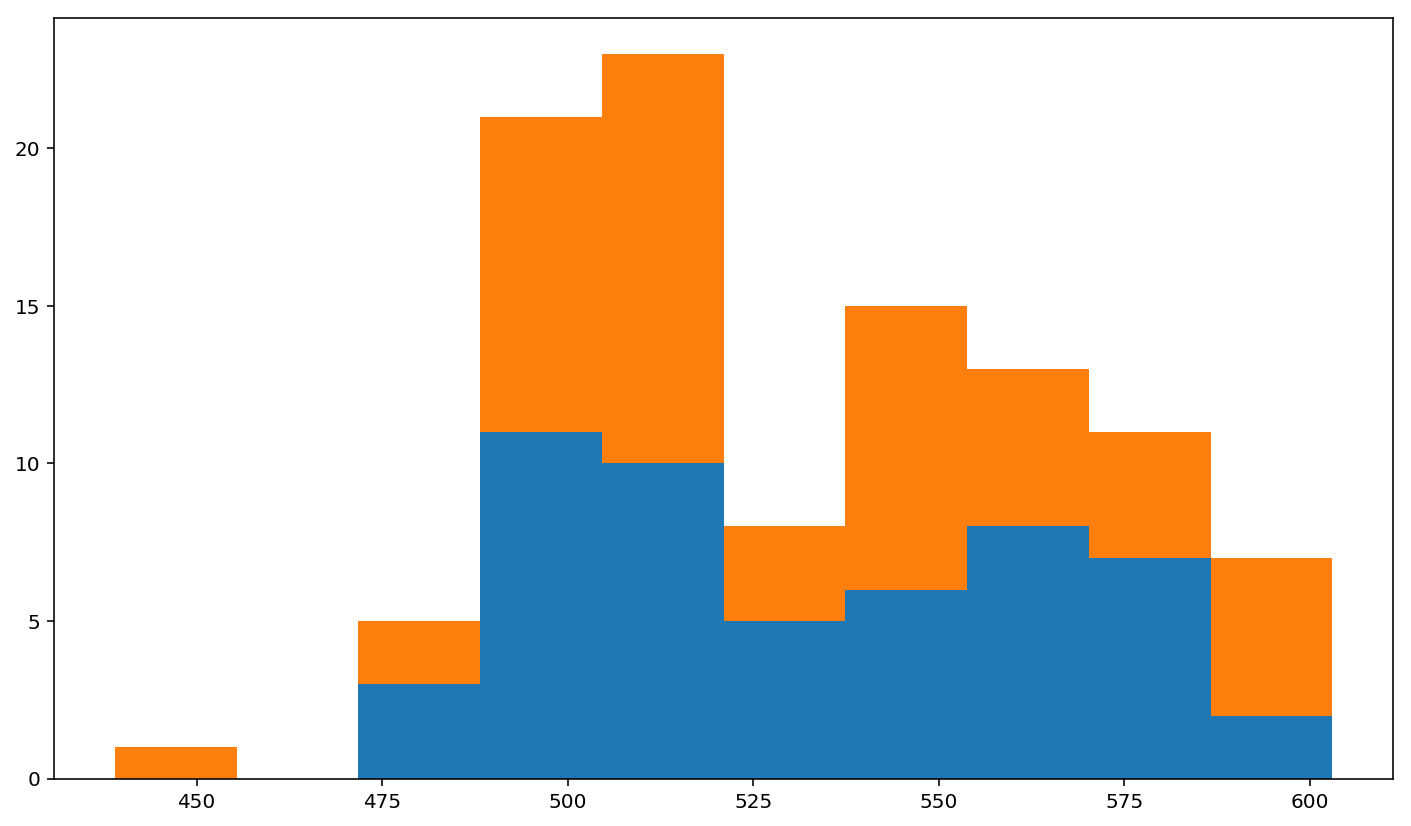

In [14]:
#set figure size for plot
plt.figure(figsize=(12,7))
plt.hist([satdf['Verbal'], satdf['Math']],stacked=True);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

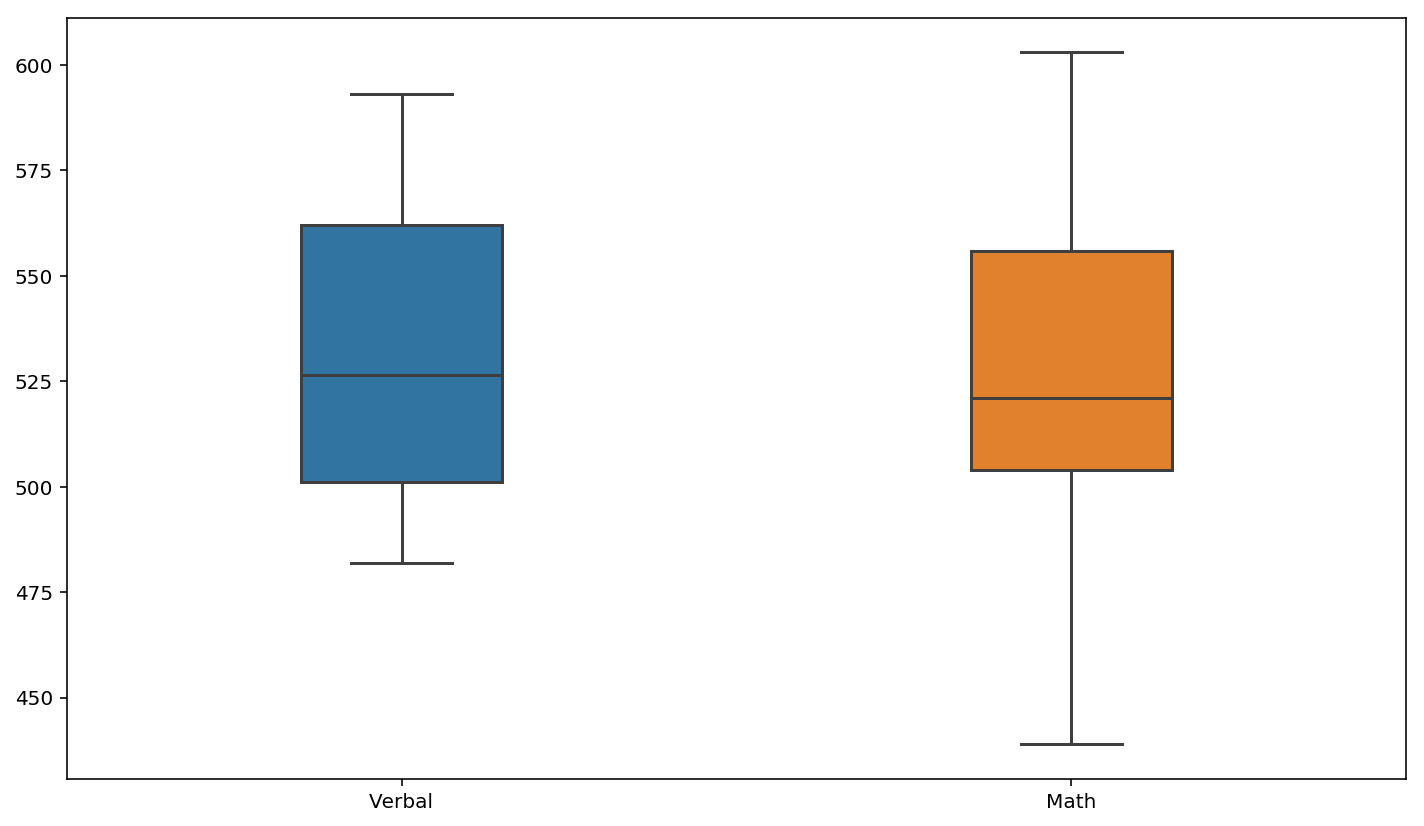

In [15]:
#set figure size for plot
plt.figure(figsize=(12,7))
sns.boxplot(data=satdf[['Verbal','Math']], width=0.3)

#boxplot allows visualisation of the percentile of values to quantify distributions better, identify outliers, and to compare multiple distributions in a less cluttered matter.
#scatterplot allows visualisation of correlation patterns
#histogram shows the type of distribution of the data

#rate is of a lower value range (<100) thus the box-plot will not be able to compare rate distribution against the other variables

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [16]:
test = satdf[['Verbal','Math','Rate']]
#create z-scores for each variable for standardisation into same scale
test_df = (test-test.mean())/test.std()

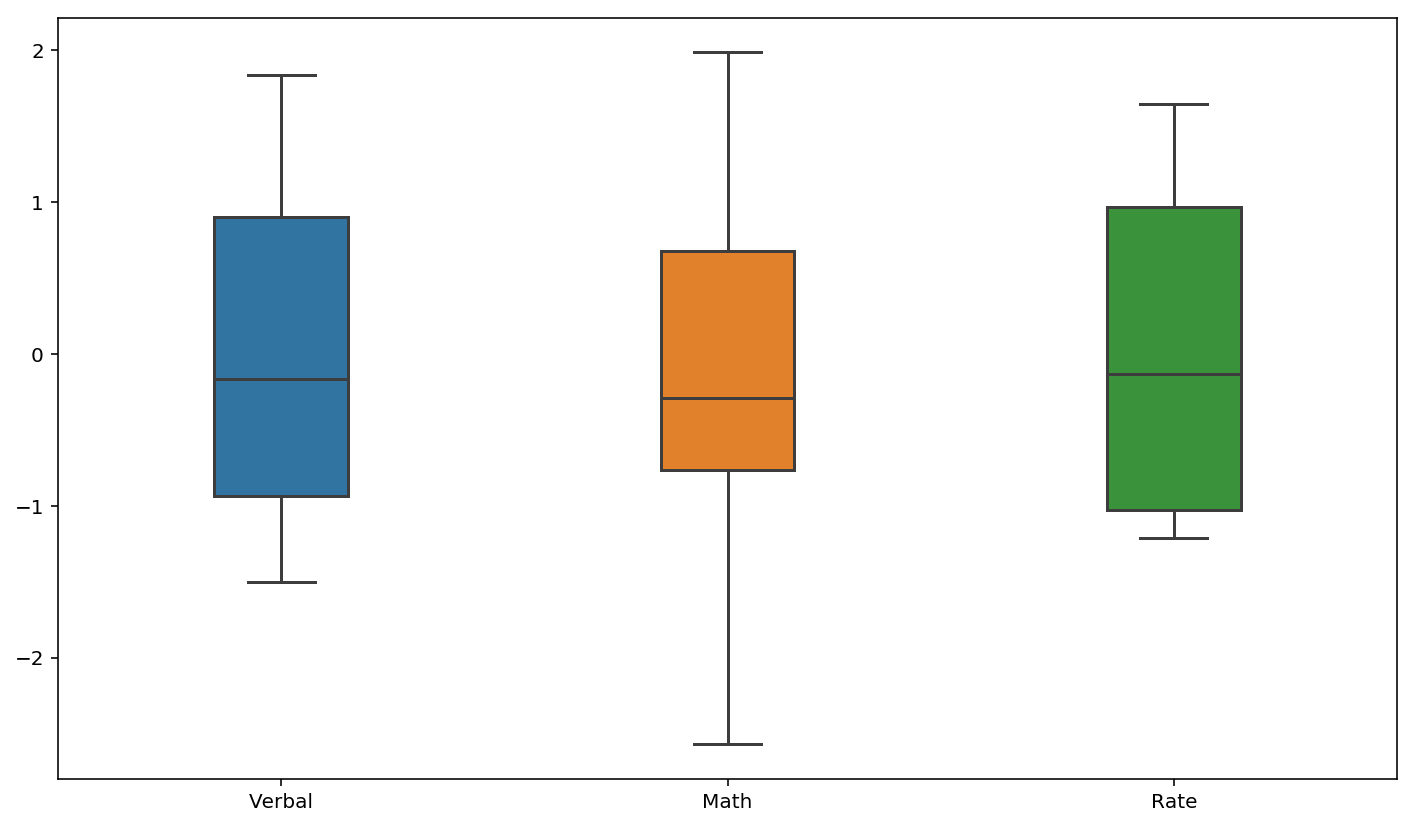

In [17]:
#set figure size for plot
plt.figure(figsize=(12,7))
sns.boxplot(data=test_df, width=0.3);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
#create new dataframe verbal_mean which locate verbal values that are greater than the overall average in the dataframe
verbal_mean = satdf.loc[satdf['Verbal'] >= satdf['Verbal'].mean(), ['State', 'Verbal']]
print ('{} states > avg Verbal Score:{}' .format(len(verbal_mean), satdf['Verbal'].mean()))
#the following 24 states have the above avg verbal score (532)
verbal_mean.sort_values('Verbal', ascending=False)

24 states > avg Verbal Score:532.019230769


State  Verbal
47    IA     593
49    ND     592
44    WI     584
37    MN     580
48    SD     577
38    KS     577
42    MO     577
33    IL     576
46    UT     575
41    OK     567
50    MS     566
43    LA     564
31    TN     562
45    AR     562
40    NE     562
36    MI     561
39    AL     559
32    NM     551
34    KY     550
35    WY     547
30    ID     543
28    MT     539
26    CO     539
27    OH     534

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
#create new dataframe verbal_median which locate verbal values that are greater than the overall median in the dataframe
verbal_median = satdf.loc[satdf['Verbal'] >= satdf['Verbal'].median(), ['State', 'Verbal']]
print ('{} states > median Verbal Score:{}' .format(len(verbal_median), satdf['Verbal'].median()))
#the following 26 states have the above avg verbal score (526)
verbal_median.sort_values('Verbal', ascending=False)
#The list is longer than the list of states which has higher than avg mean due to a right-skewed distribution

26 states > median Verbal Score:526.5


State  Verbal
47    IA     593
49    ND     592
44    WI     584
37    MN     580
38    KS     577
48    SD     577
42    MO     577
33    IL     576
46    UT     575
41    OK     567
50    MS     566
43    LA     564
40    NE     562
31    TN     562
45    AR     562
36    MI     561
39    AL     559
32    NM     551
34    KY     550
35    WY     547
30    ID     543
26    CO     539
28    MT     539
27    OH     534
29    WV     527
19    WA     527

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
satdf['VMdiff'] = satdf['Verbal'] - satdf['Math']
satdf.head(3)

State  Rate  Verbal  Math  VMdiff
0    CT    82     509   510      -1
1    NJ    81     499   513     -14
2    MA    79     511   515      -4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [21]:
#Sorted by greatest positive difference where Verbal is greater than Math
dfVmoreM = satdf.sort_values('VMdiff', ascending=False).head(10)
print dfVmoreM.reset_index(drop=True).head(3)

#Sorted by greatest negative difference where Math is greater than Verbal
dfMmoreV = satdf.sort_values('VMdiff', ascending=True).head(10)
print dfMmoreV.reset_index(drop=True).head(3)

  State  Rate  Verbal  Math  VMdiff
0    OH    26     534   439      95
1    MS     4     566   551      15
2    WV    18     527   512      15
  State  Rate  Verbal  Math  VMdiff
0    HI    52     485   515     -30
1    CA    51     498   517     -19
2    NJ    81     499   513     -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
satdf[['Rate','Verbal','Math']].corr()
#Math and Verbal is highly positively correlated while rate is highly negatively correlated with the other two variables

Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
satdf.describe()
#count is the number of rows of data
#mean is the average value of the variable
#std is the standard deviation of the variable
#min is the minimum vale of the variable
#25% is the 25th percentile value of the variable distribution
#50% is the 25th percentile value of the variable distribution
#75% is the 25th percentile value of the variable distribution
#max is the maximum vale of the variable

Rate      Verbal        Math     VMdiff
count  52.000000   52.000000   52.000000  52.000000
mean   37.153846  532.019231  531.500000   0.519231
std    27.301788   33.236225   36.014975  15.729939
min     4.000000  482.000000  439.000000 -30.000000
25%     9.000000  501.000000  504.000000  -6.000000
50%    33.500000  526.500000  521.000000   0.000000
75%    63.500000  562.000000  555.750000   4.250000
max    82.000000  593.000000  603.000000  95.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
a = satdf['Rate']
b = satdf['Verbal']
c = satdf['Math']
x = np.vstack([a,b,c])
cov = np.cov(x)
cov
#covariance values are beyond (-1,1)
#covariance divides by standard deviation of x and y to give correlation
#correlation takes into account the variable magnitude and standardizes the relationship in (-1,1)

array([[ 745.38763198, -804.35595777, -760.80392157],
       [-804.35595777, 1104.64668175, 1077.14705882],
       [-760.80392157, 1077.14705882, 1297.07843137]])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [25]:
drugdf = pd.read_csv('drug-use-by-age.csv')

In [26]:
drugdf.head()
#missing variables with '-' values require cleaning

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [27]:
drugdf.info()
#values with '-' are making columns into objects, to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [28]:
#data cleaning: convert to float and force '-' values into np.nan
drugdf['cocaine-frequency'] = pd.to_numeric(drugdf['cocaine-frequency'], errors='coerce')
drugdf['crack-frequency'] = pd.to_numeric(drugdf['crack-frequency'], errors='coerce')
drugdf['heroin-frequency'] = pd.to_numeric(drugdf['heroin-frequency'], errors='coerce')
drugdf['inhalant-frequency'] = pd.to_numeric(drugdf['inhalant-frequency'], errors='coerce')
drugdf['oxycontin-frequency'] = pd.to_numeric(drugdf['oxycontin-frequency'], errors='coerce')
drugdf['meth-frequency'] = pd.to_numeric(drugdf['meth-frequency'], errors='coerce')

In [29]:
drugdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [30]:
#seperate use percentage and median frequency values into two dataframes
#druguse percentage dataframe
druguse = drugdf.filter(regex='se$', axis=1)
druguse = pd.concat([drugdf[['age','n']], druguse], axis=1)
druguse.set_index('age', inplace=True)
#drugmedian frequency dataframe
drugmed = drugdf.filter(regex='y$', axis=1)
drugmed = pd.concat([drugdf[['age','n']], drugmed], axis=1)
drugmed.set_index('age', inplace=True)

In [31]:
druguse.head()

n  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
age                                                                         
12   2798          3.9            1.1          0.1        0.0         0.1   
13   2757          8.5            3.4          0.1        0.0         0.0   
14   2792         18.1            8.7          0.1        0.0         0.1   
15   2956         29.2           14.5          0.5        0.1         0.2   
16   3058         40.1           22.5          1.0        0.0         0.1   

     hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
age                                                                     
12                0.2           1.6                2.0            0.1   
13                0.6           2.5                2.4            0.1   
14                1.6           2.6                3.9            0.4   
15                2.1           2.5                5.5            0.8   
16                3.4           3.0                6.2            1.1   

     tranquilizer-use  stimulant-use  meth-use  sedative-use  
age                                                           
12                0.2            0.2       0.0           0.2  
13                0.3            0.3       0.1           0.1  
14                0.9            0.8       0.1           0.2  
15                2.0            1.5       0.3           0.4  
16                2.4            1.8       0.3           0.2

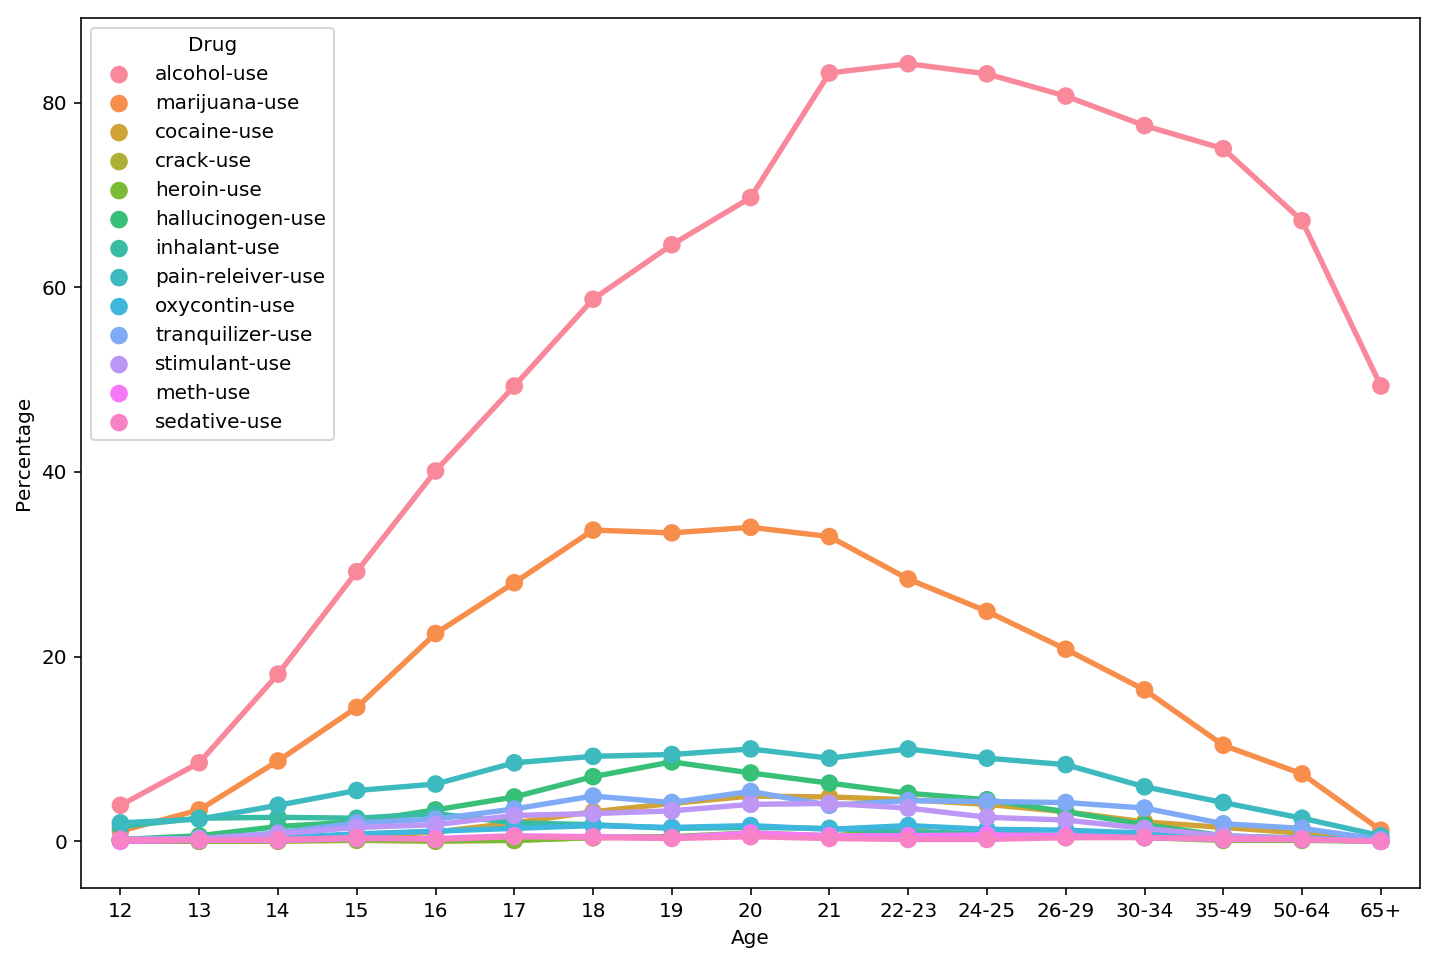

In [40]:
#Overview of drug usage distribution; comparison across different drugs. Proportion of population using drugs seems to have a peak point in the early twenties before dropping
druguse2 = druguse.iloc[:,1:].stack().reset_index()
druguse2.columns = ['Age','Drug','Percentage']
plt.figure(figsize=(12,8))
ax = sns.pointplot(x='Age', y='Percentage', hue='Drug',data=druguse2)

In [34]:
drugmed.head()

n  alcohol-frequency  marijuana-frequency  cocaine-frequency  \
age                                                                    
12   2798                3.0                  4.0                5.0   
13   2757                6.0                 15.0                1.0   
14   2792                5.0                 24.0                5.5   
15   2956                6.0                 25.0                4.0   
16   3058               10.0                 30.0                7.0   

     crack-frequency  heroin-frequency  hallucinogen-frequency  \
age                                                              
12               NaN              35.5                    52.0   
13               3.0               NaN                     6.0   
14               NaN               2.0                     3.0   
15               9.5               1.0                     4.0   
16               1.0              66.5                     3.0   

     inhalant-frequency  pain-releiver-frequency  oxycontin-frequency  \
age                                                                     
12                 19.0                     36.0                 24.5   
13                 12.0                     14.0                 41.0   
14                  5.0                     12.0                  4.5   
15                  5.5                     10.0                  3.0   
16                  3.0                      7.0                  4.0   

     tranquilizer-frequency  stimulant-frequency  meth-frequency  \
age                                                                
12                     52.0                  2.0             NaN   
13                     25.5                  4.0             5.0   
14                      5.0                 12.0            24.0   
15                      4.5                  6.0            10.5   
16                     11.0                  9.5            36.0   

     sedative-frequency  
age                      
12                 13.0  
13                 19.0  
14                 16.5  
15                 30.0  
16                  3.0

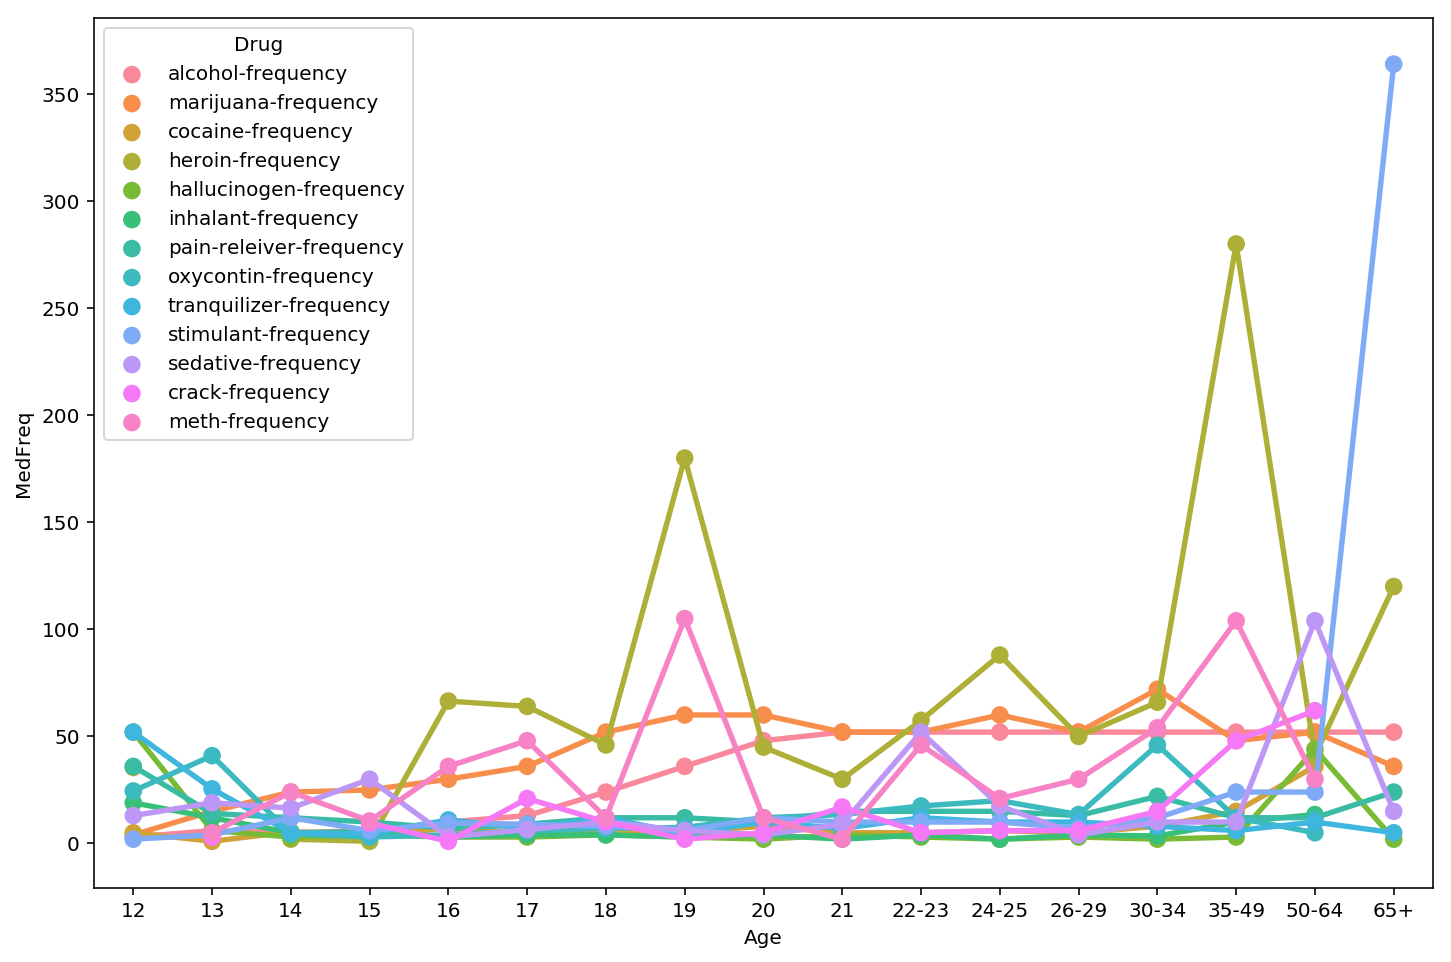

In [43]:
#Overview of drug median frequency distribution; comparison across different drugs. Drug usage frequency seems to have an age cyclical component
drugmed2.columns = ['Age','Drug','MedFreq']
plt.figure(figsize=(12,8))
ax = sns.pointplot(x='Age', y='MedFreq', hue='Drug',data=drugmed2)

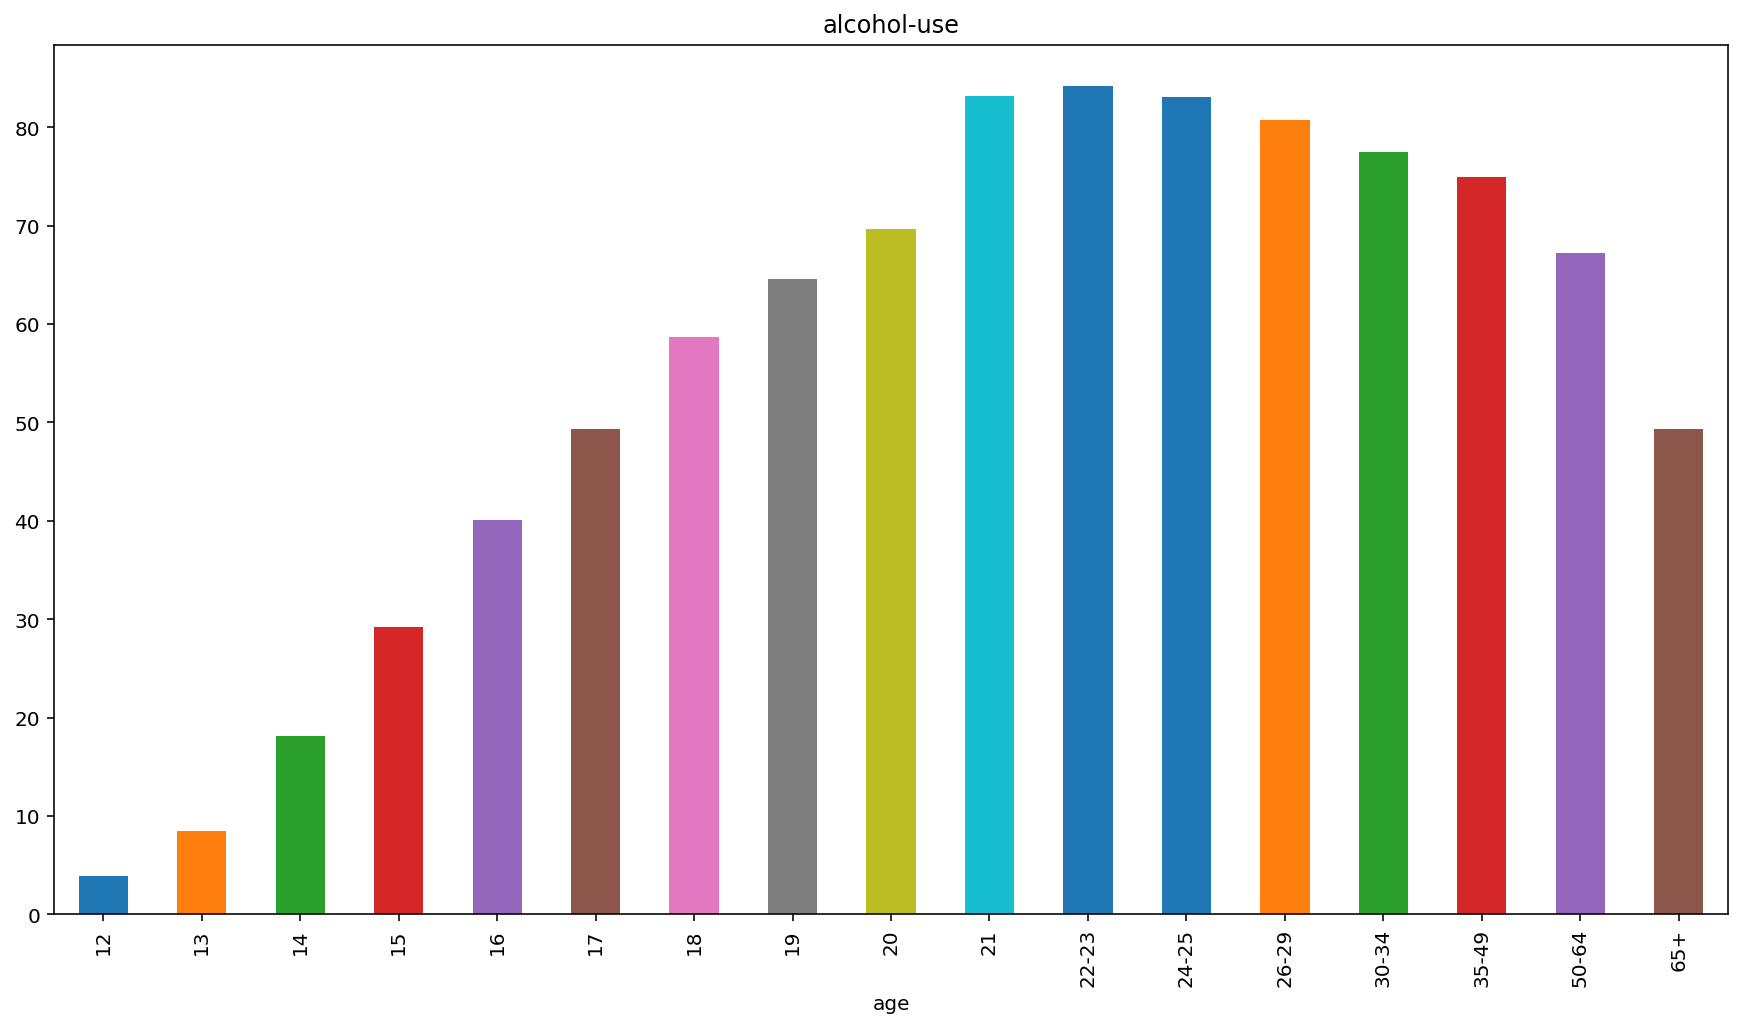

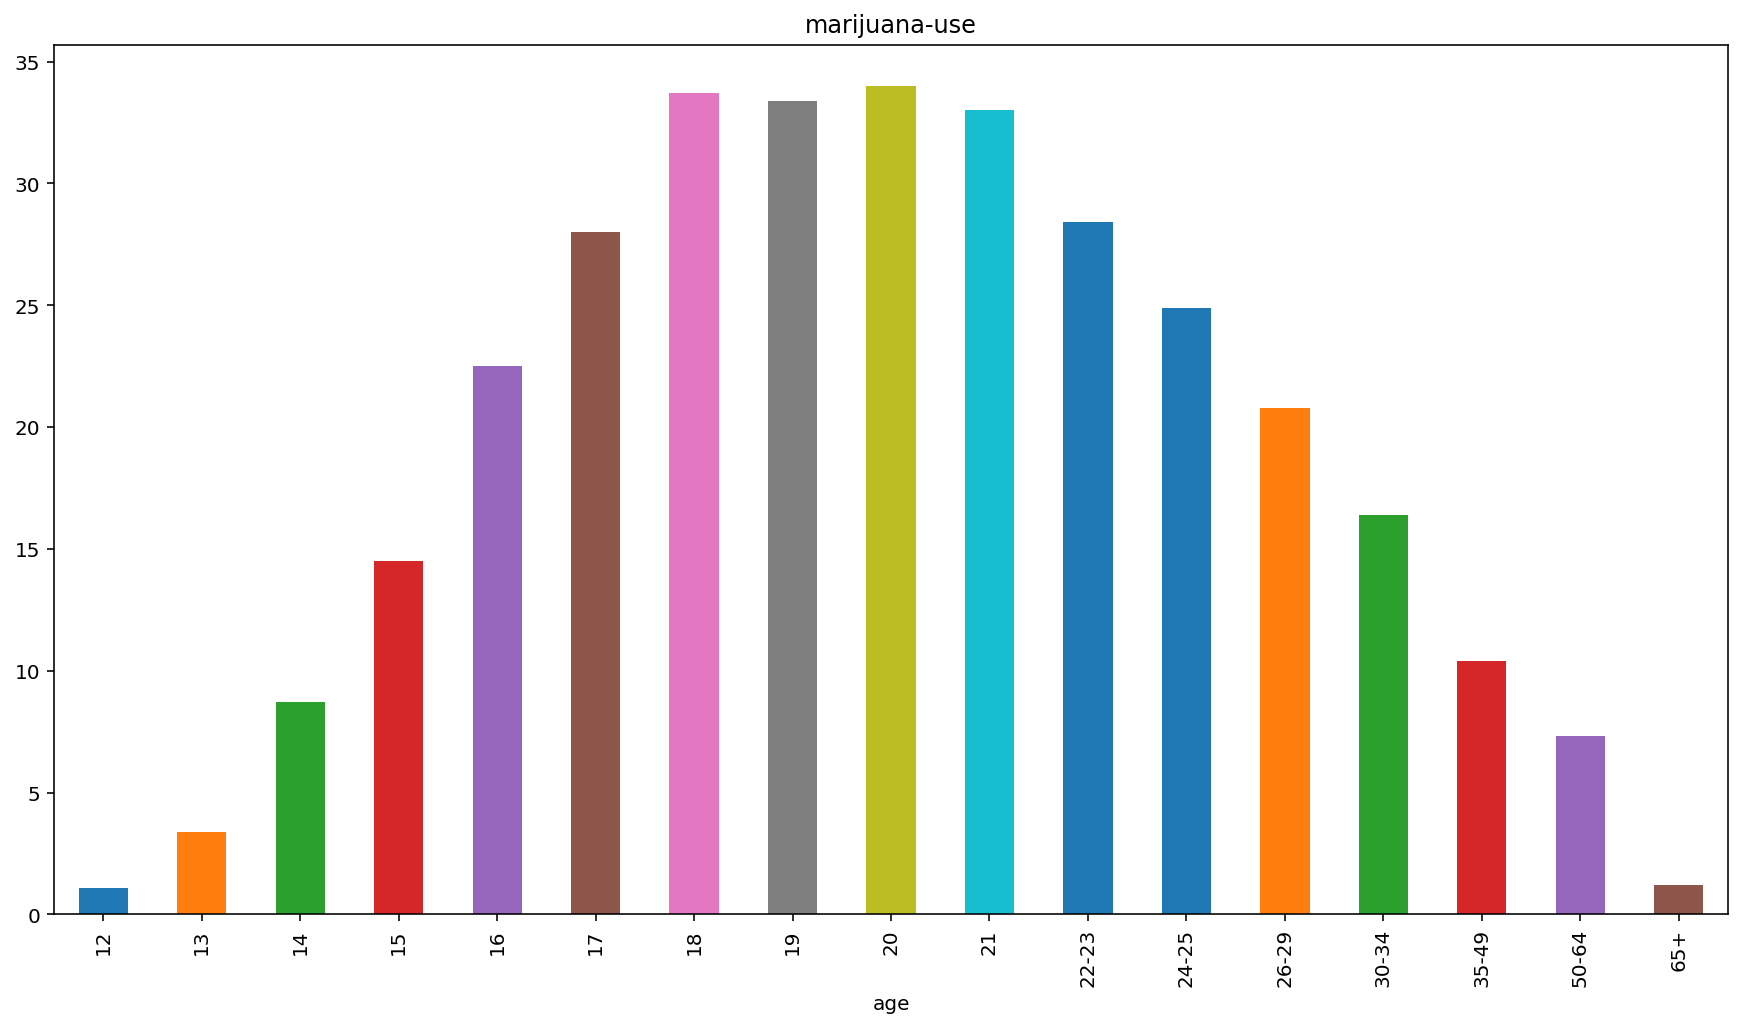

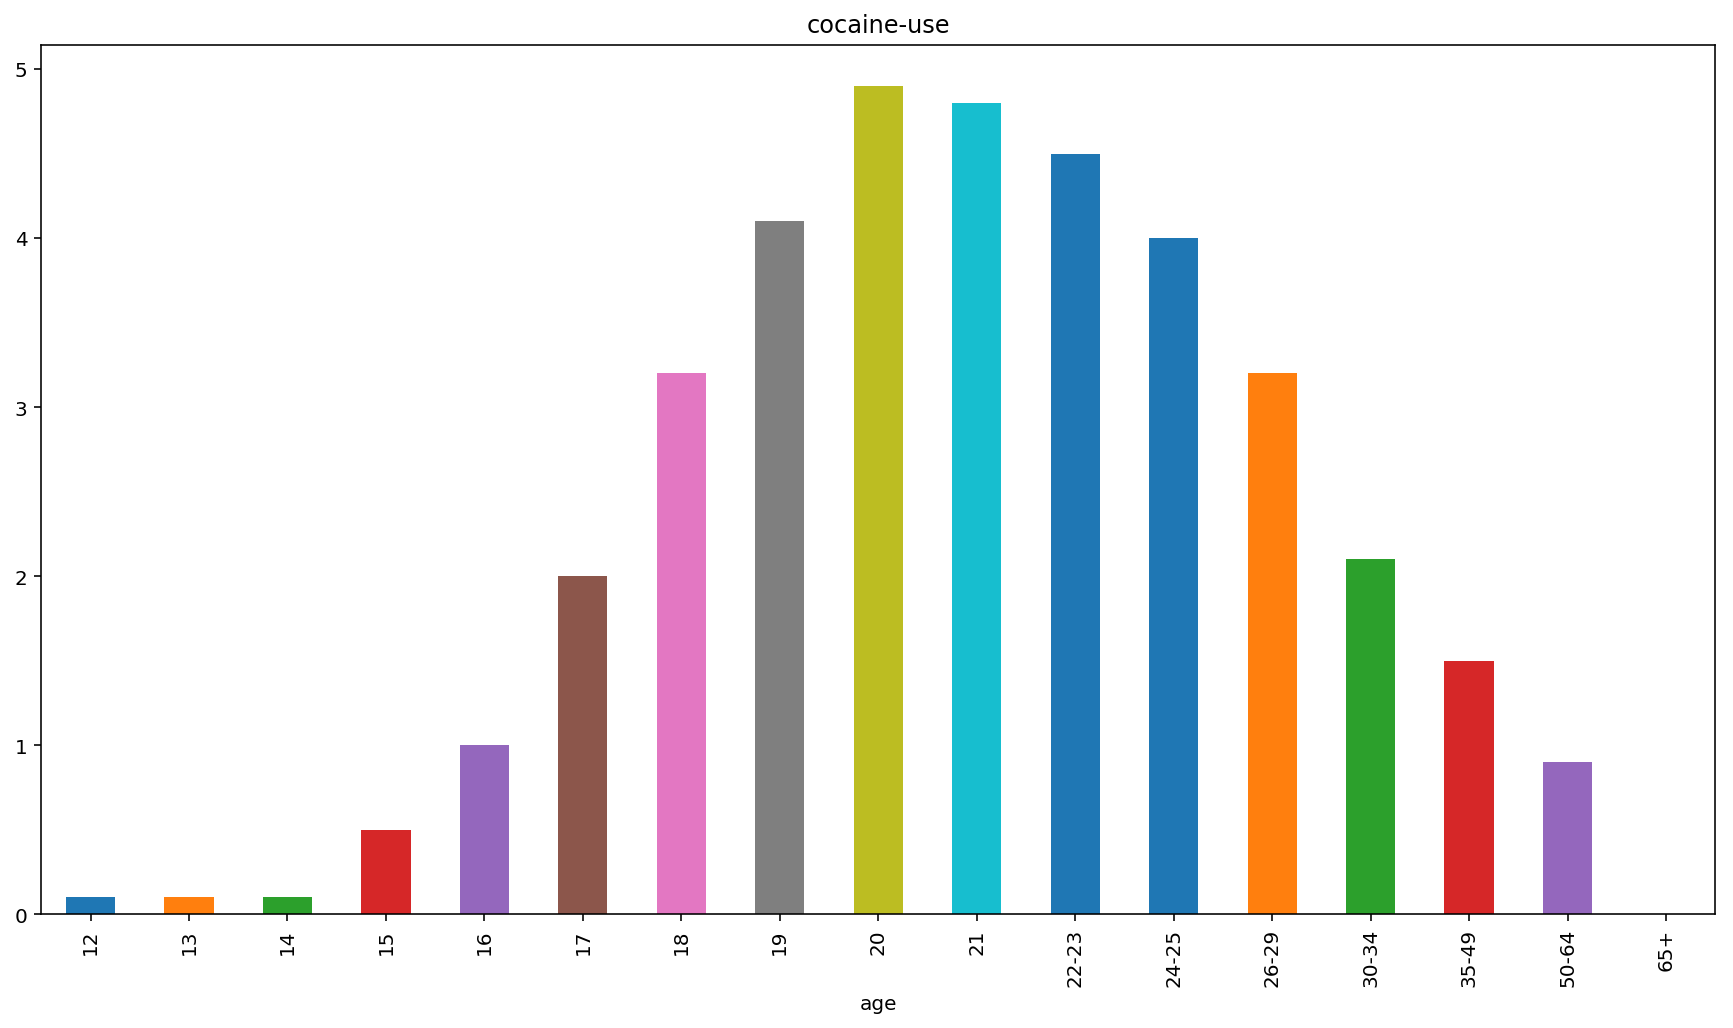

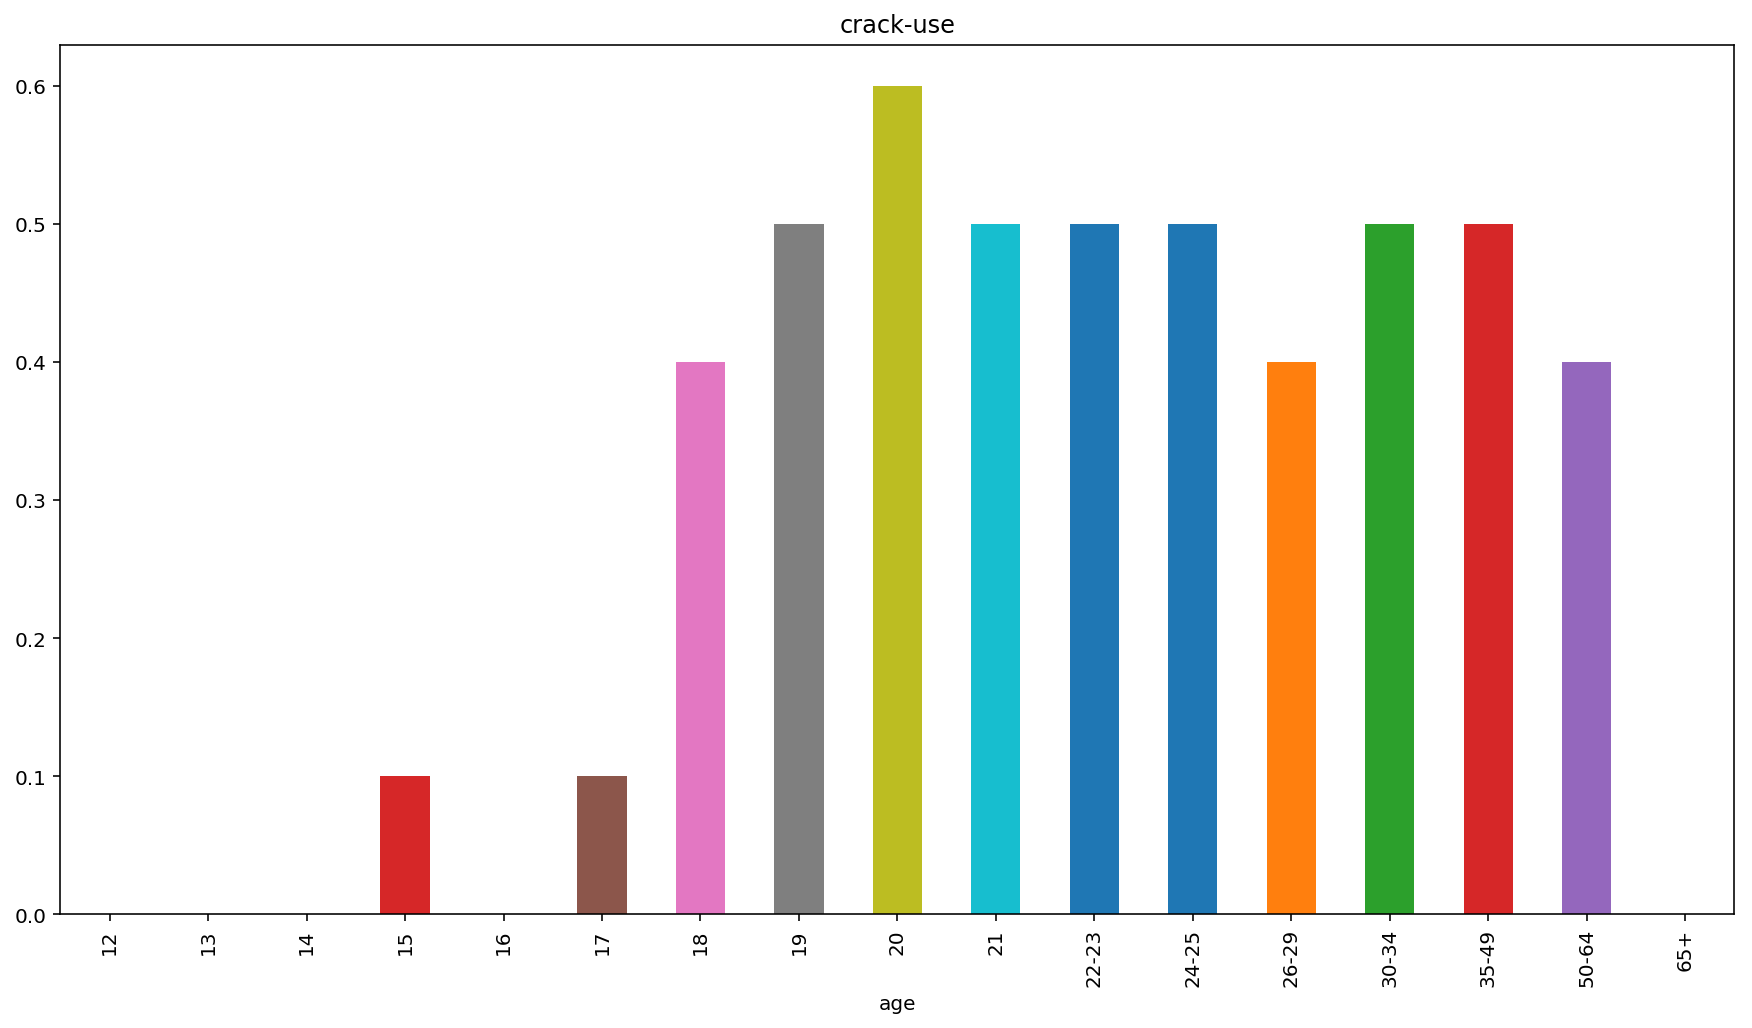

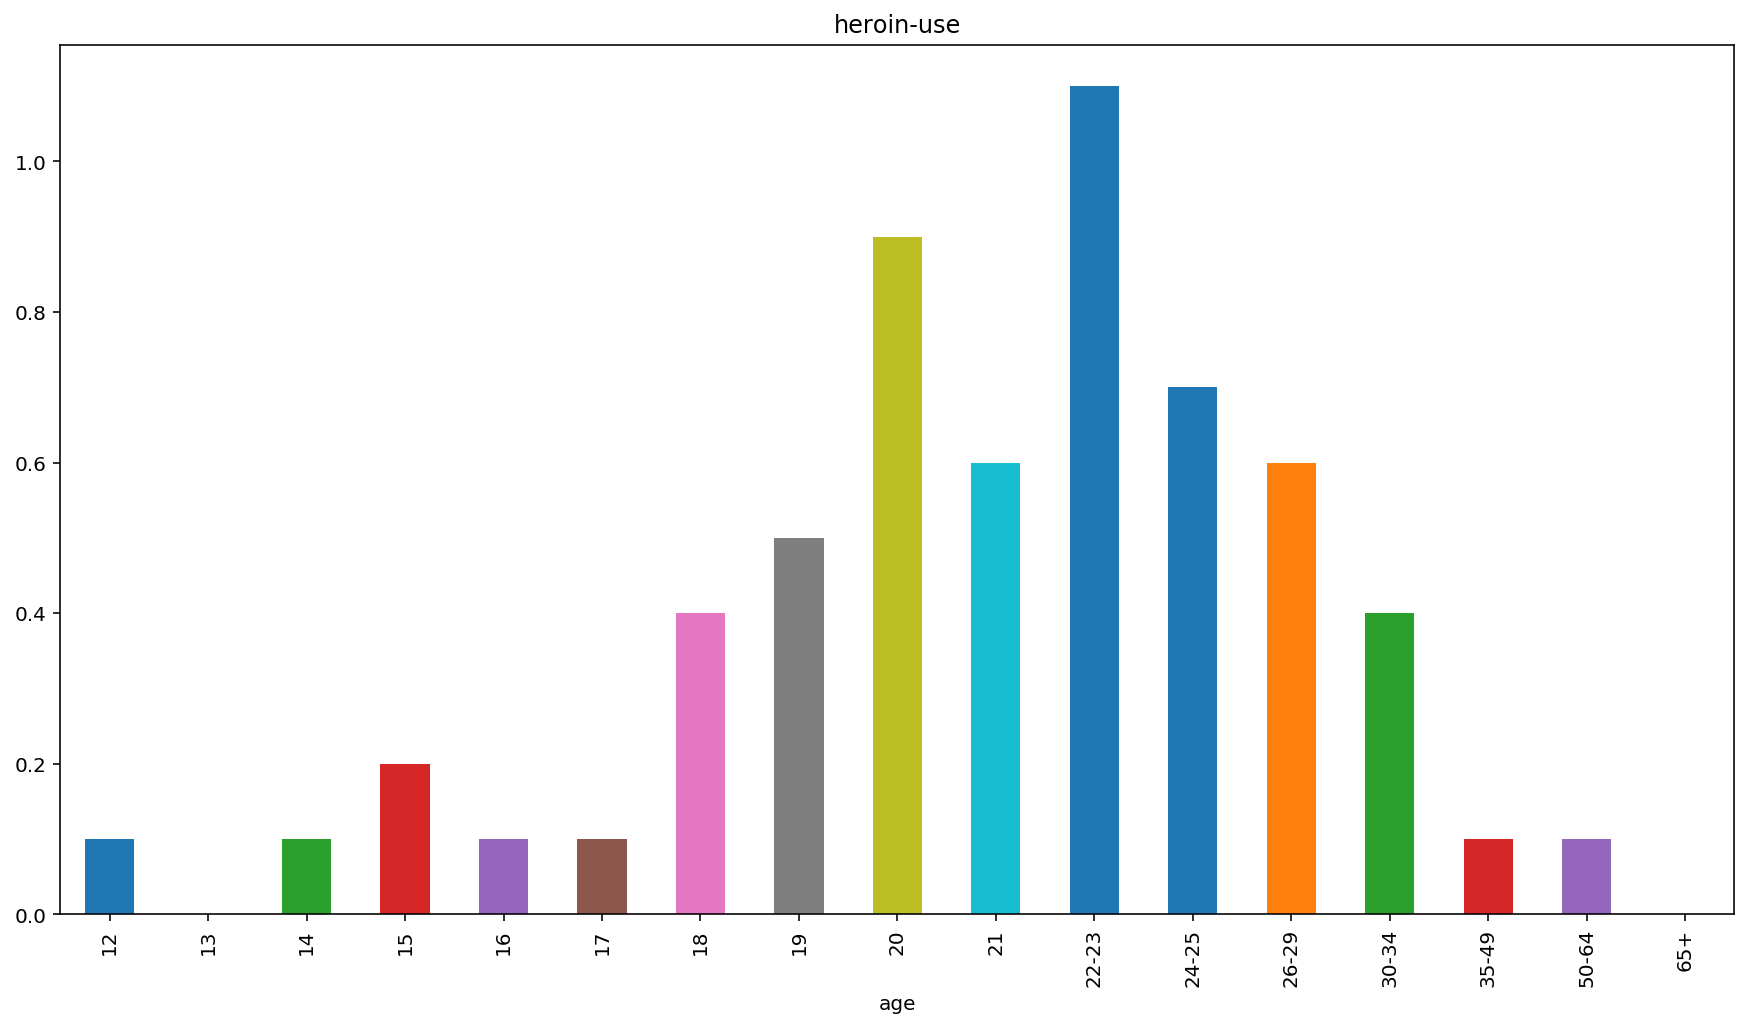

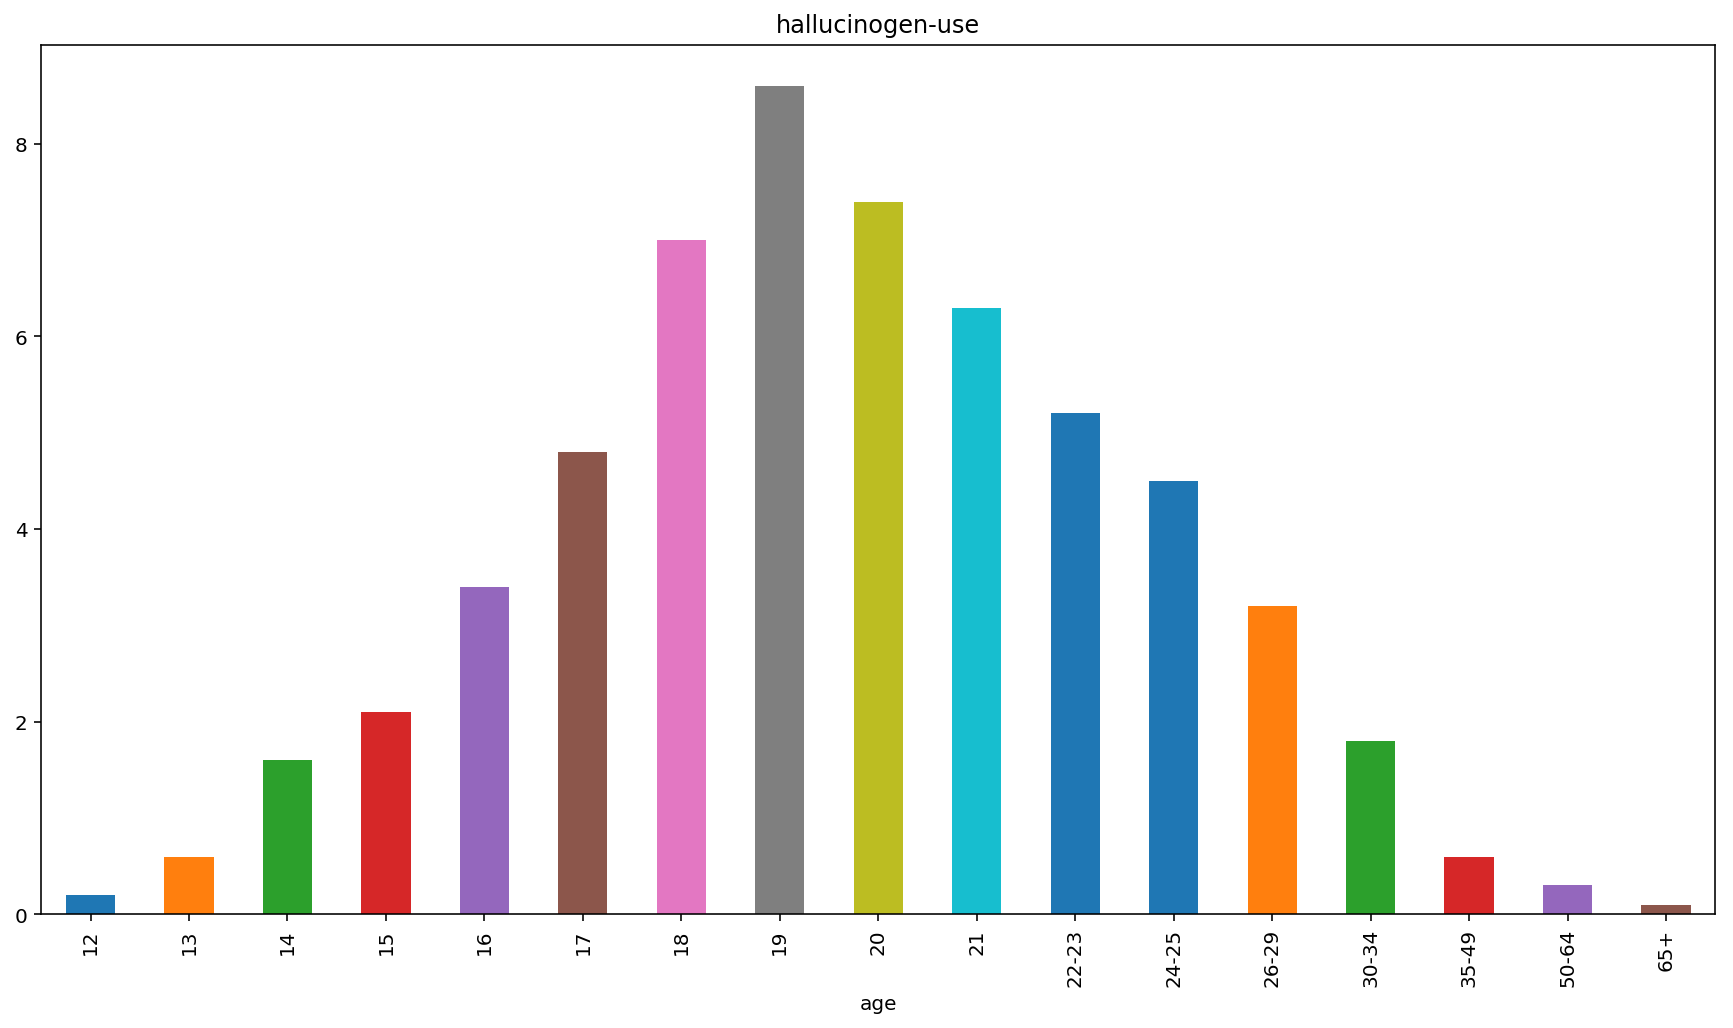

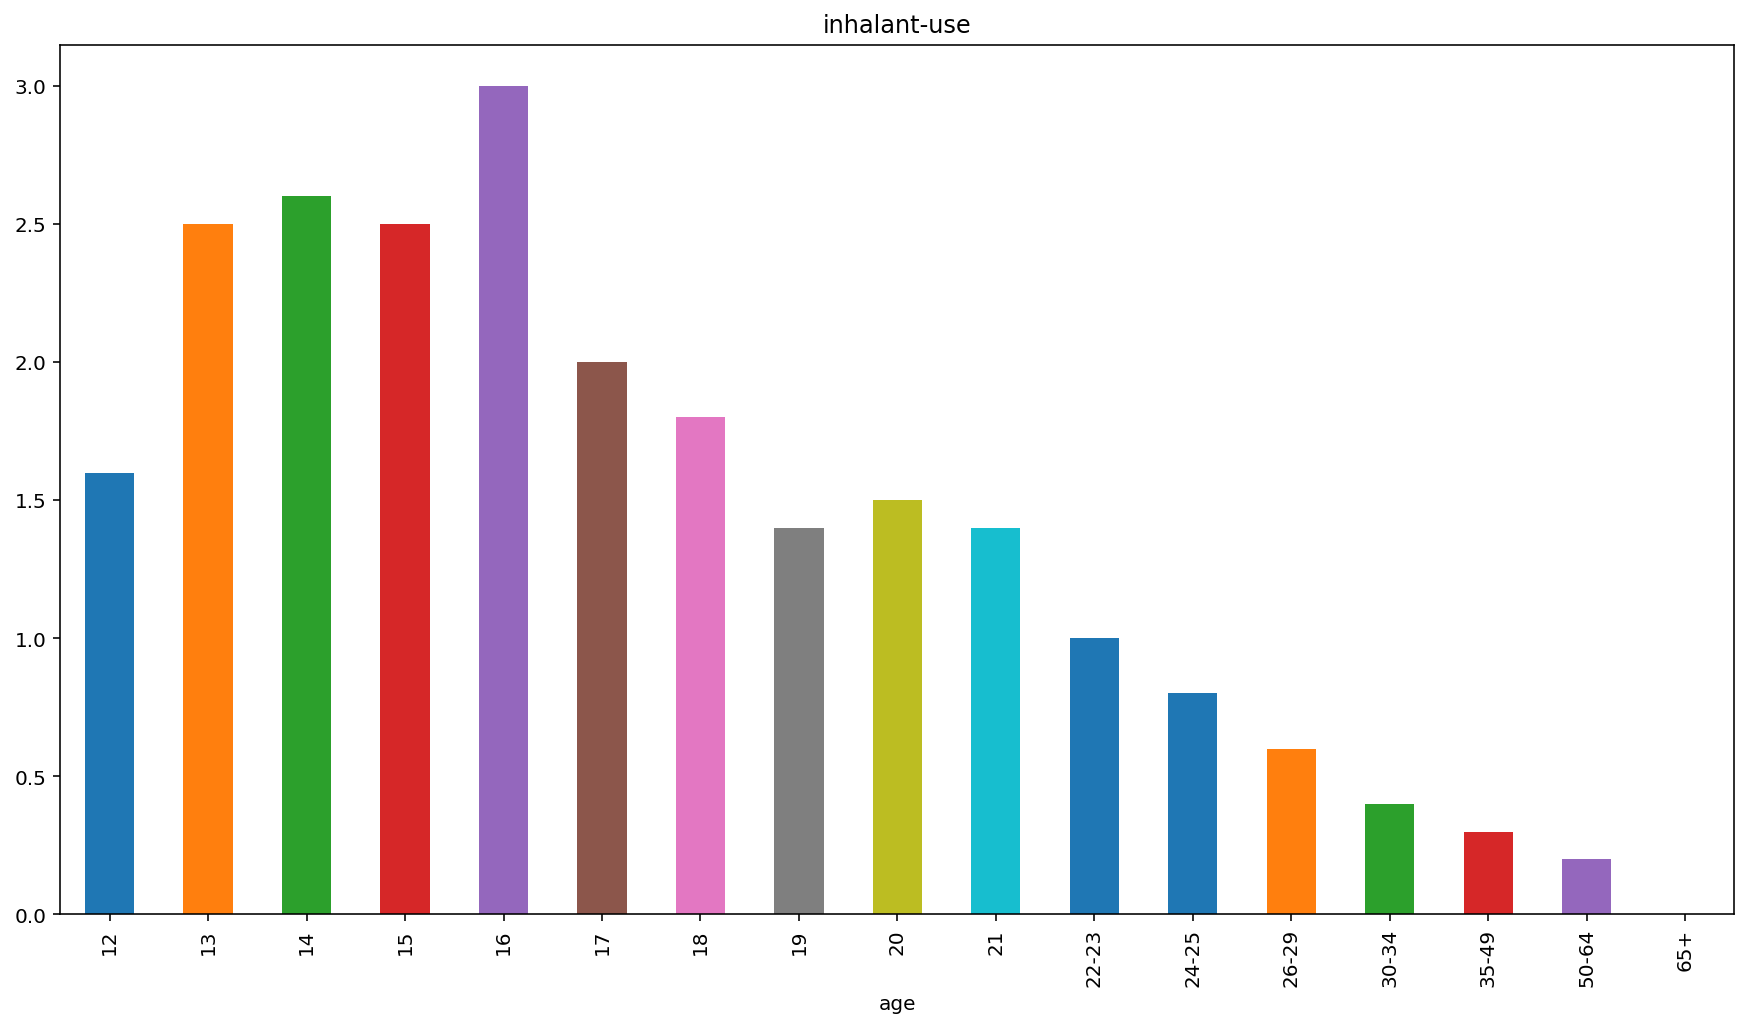

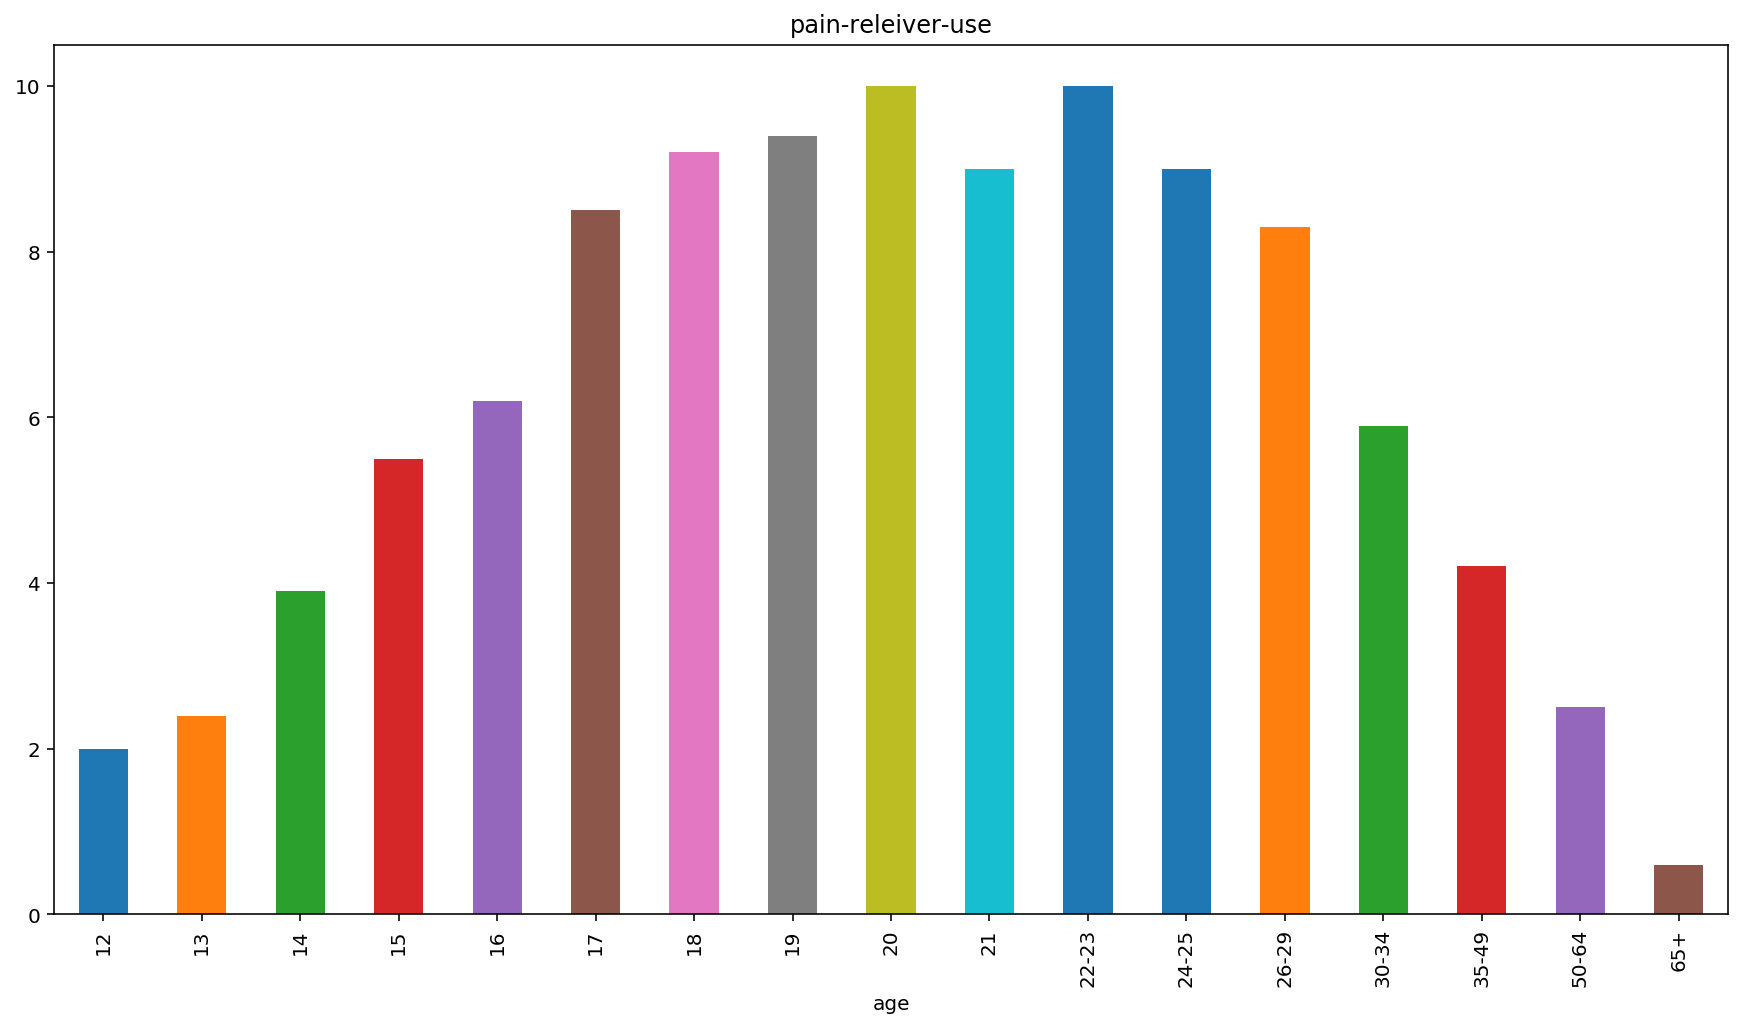

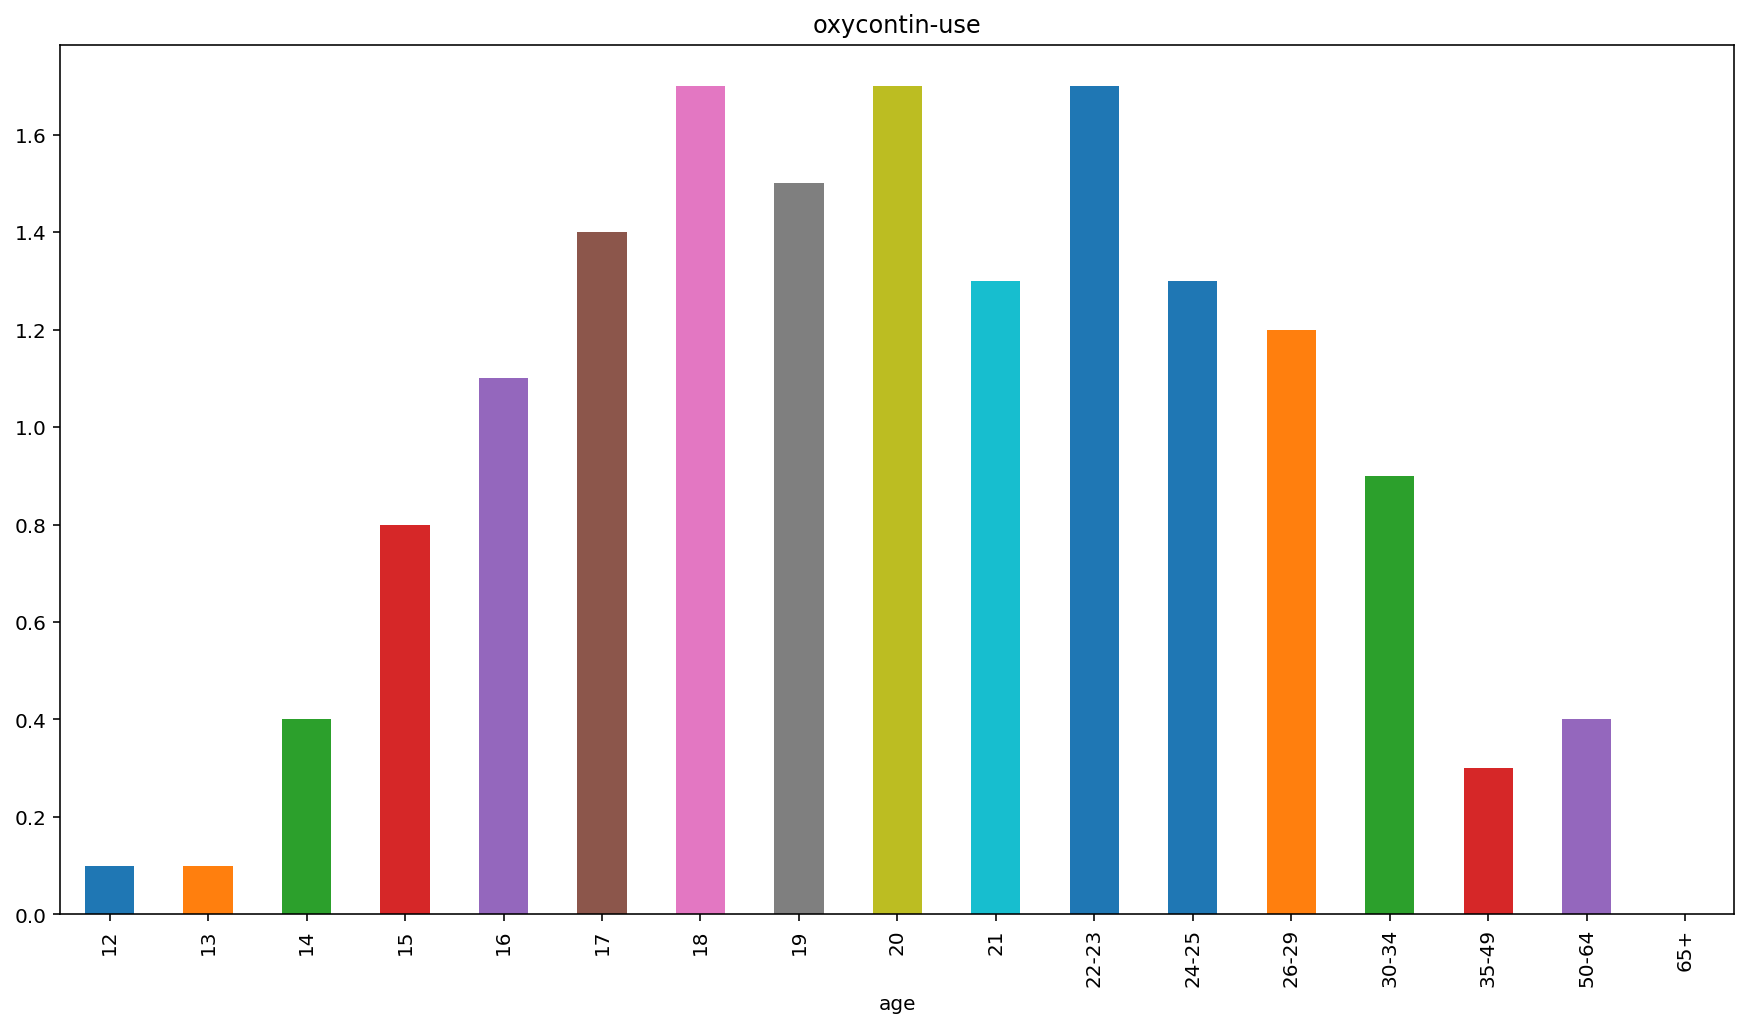

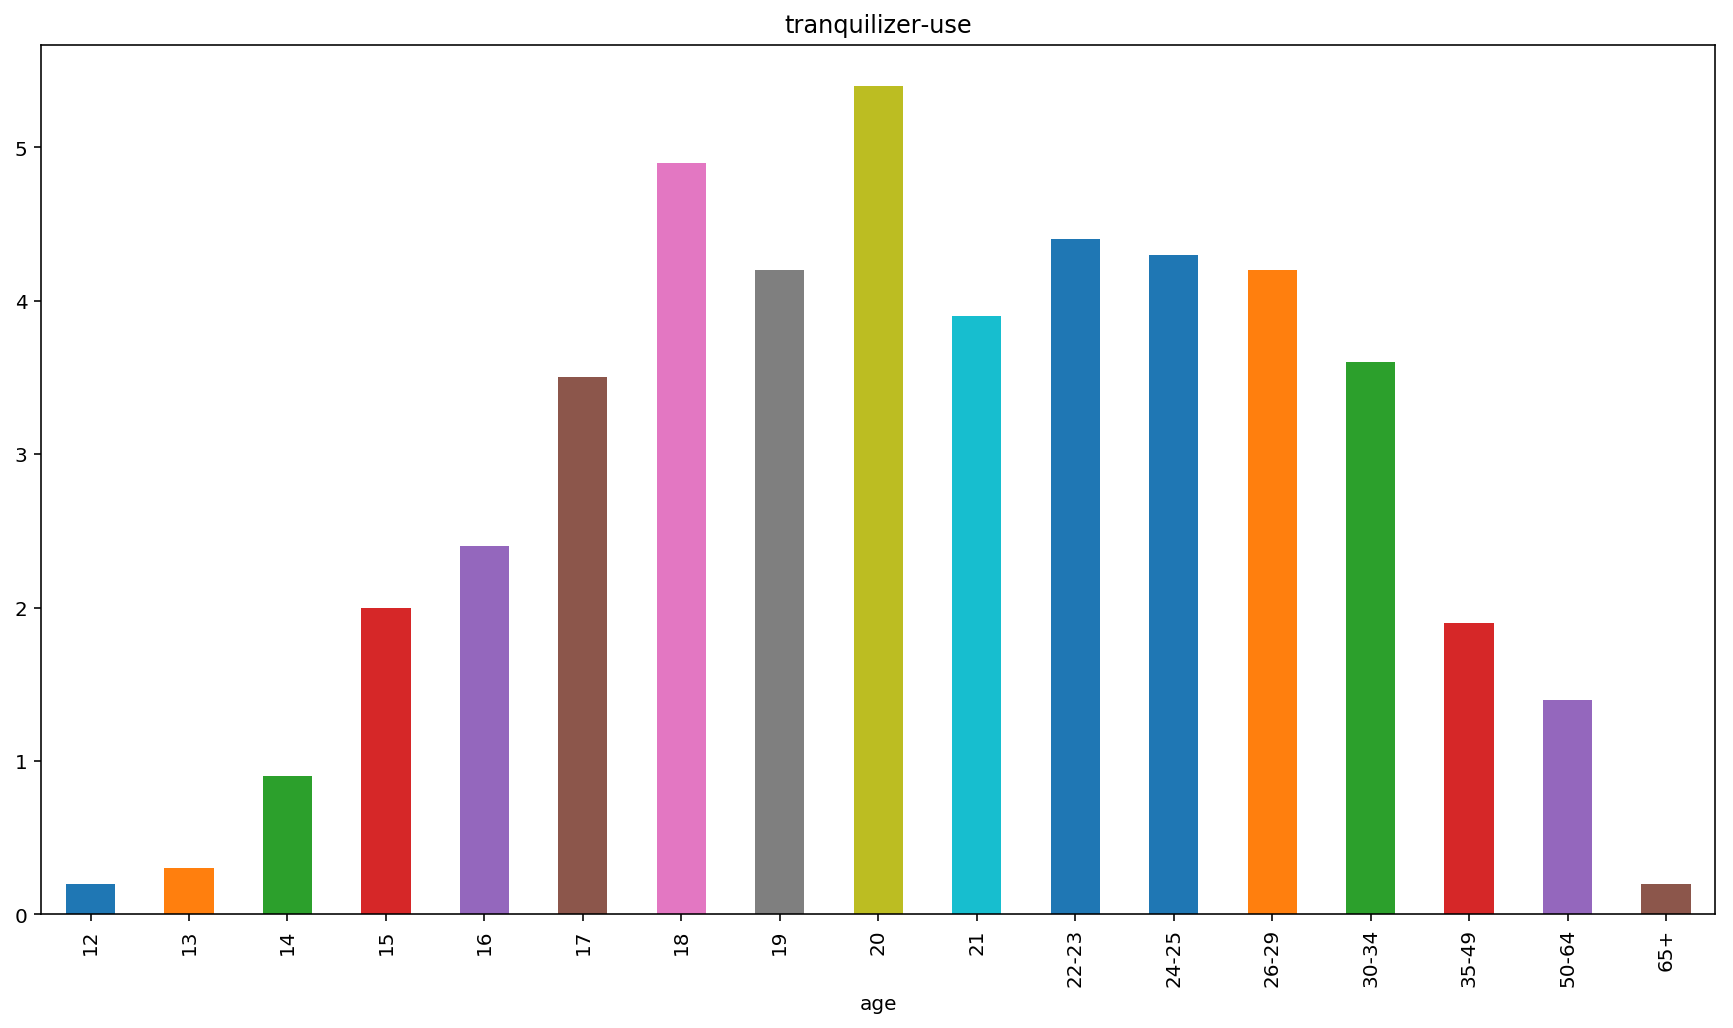

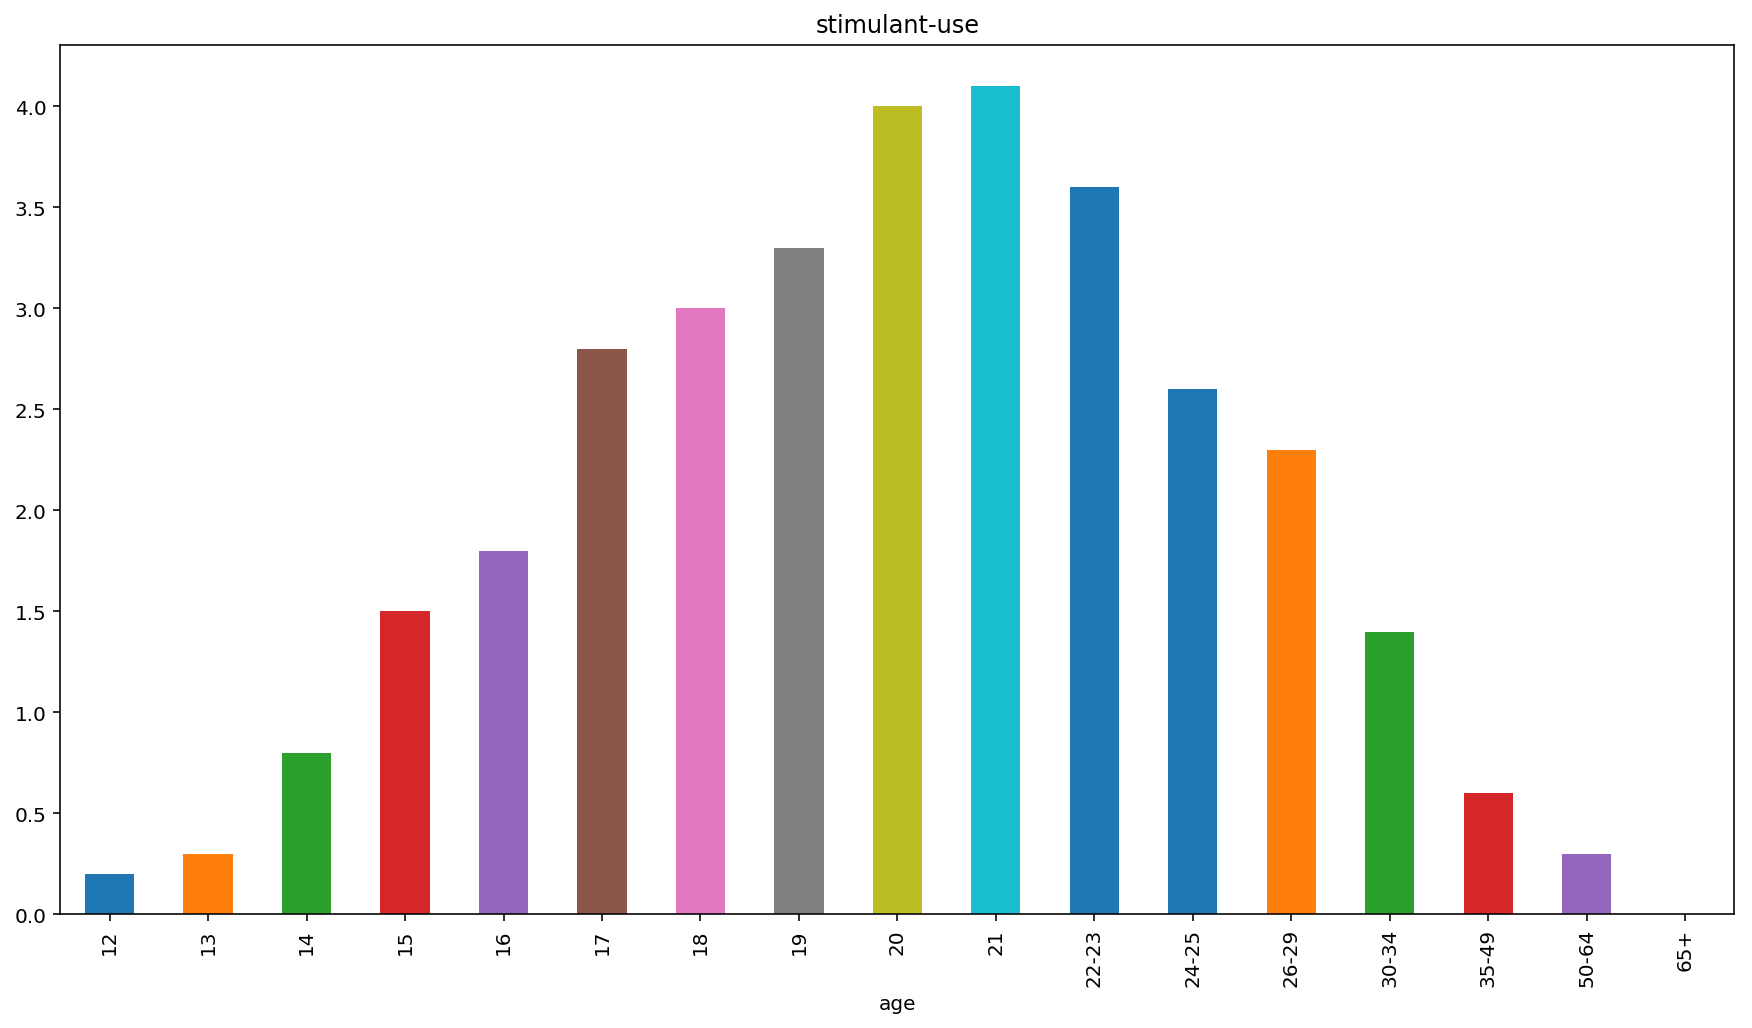

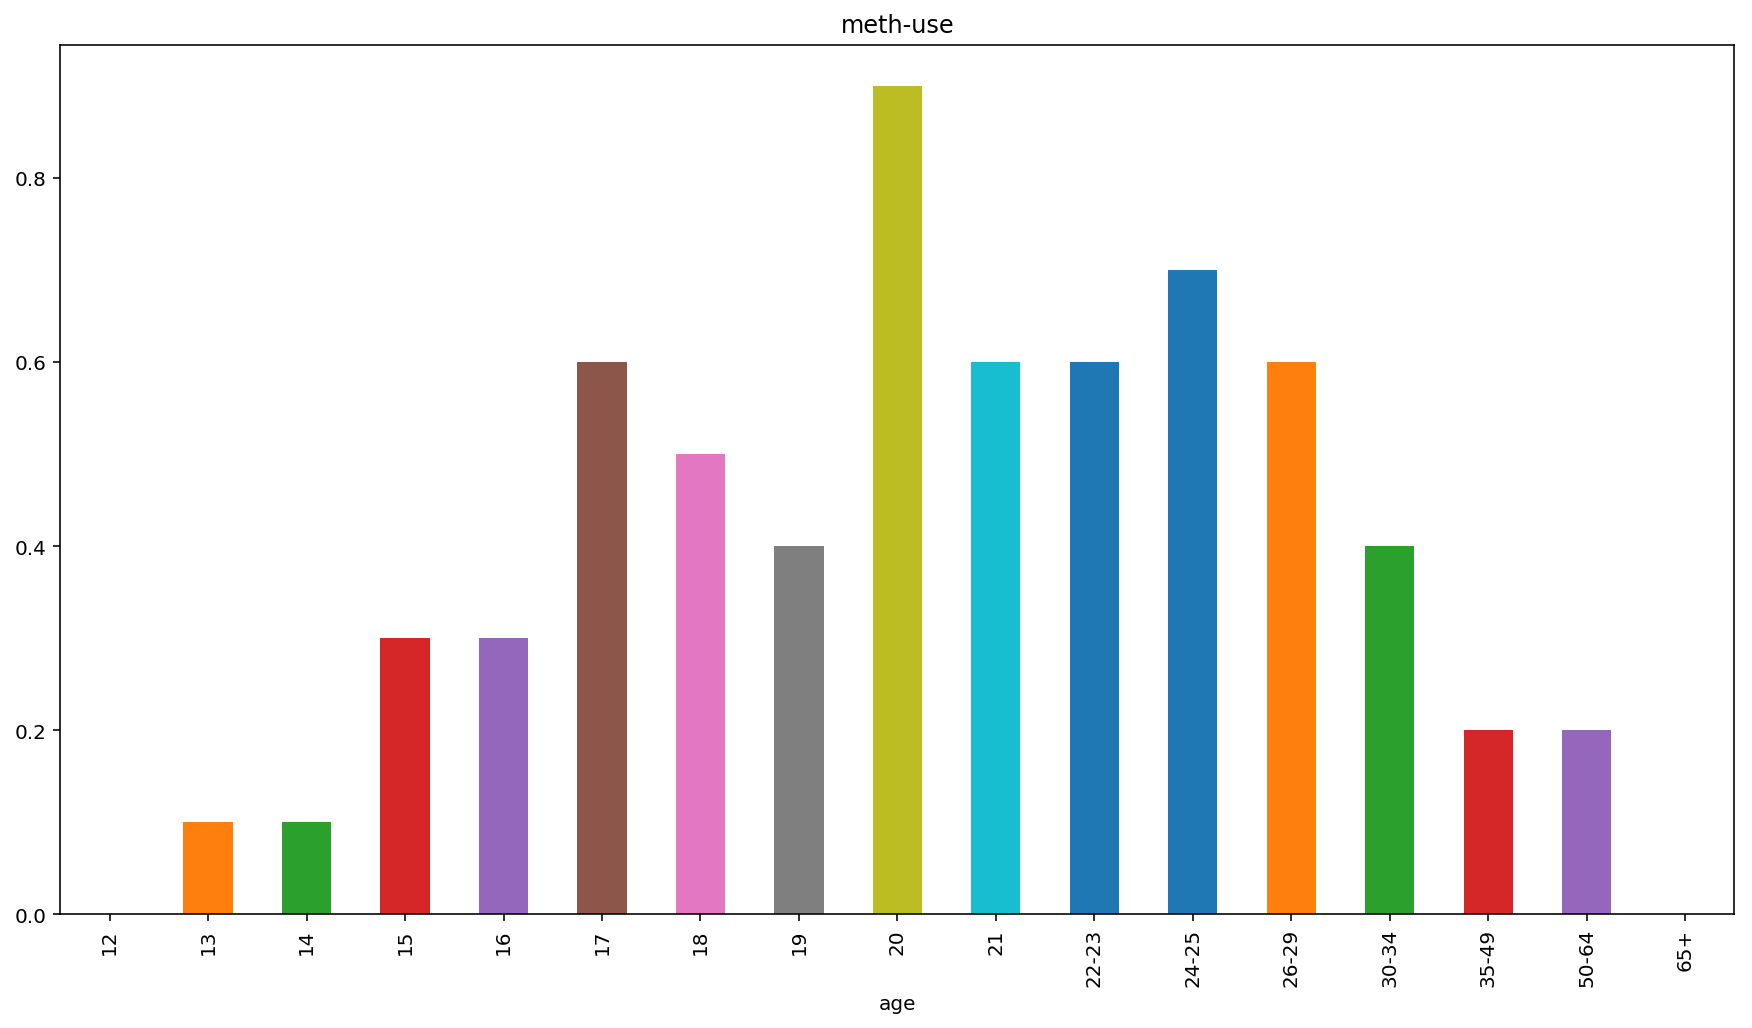

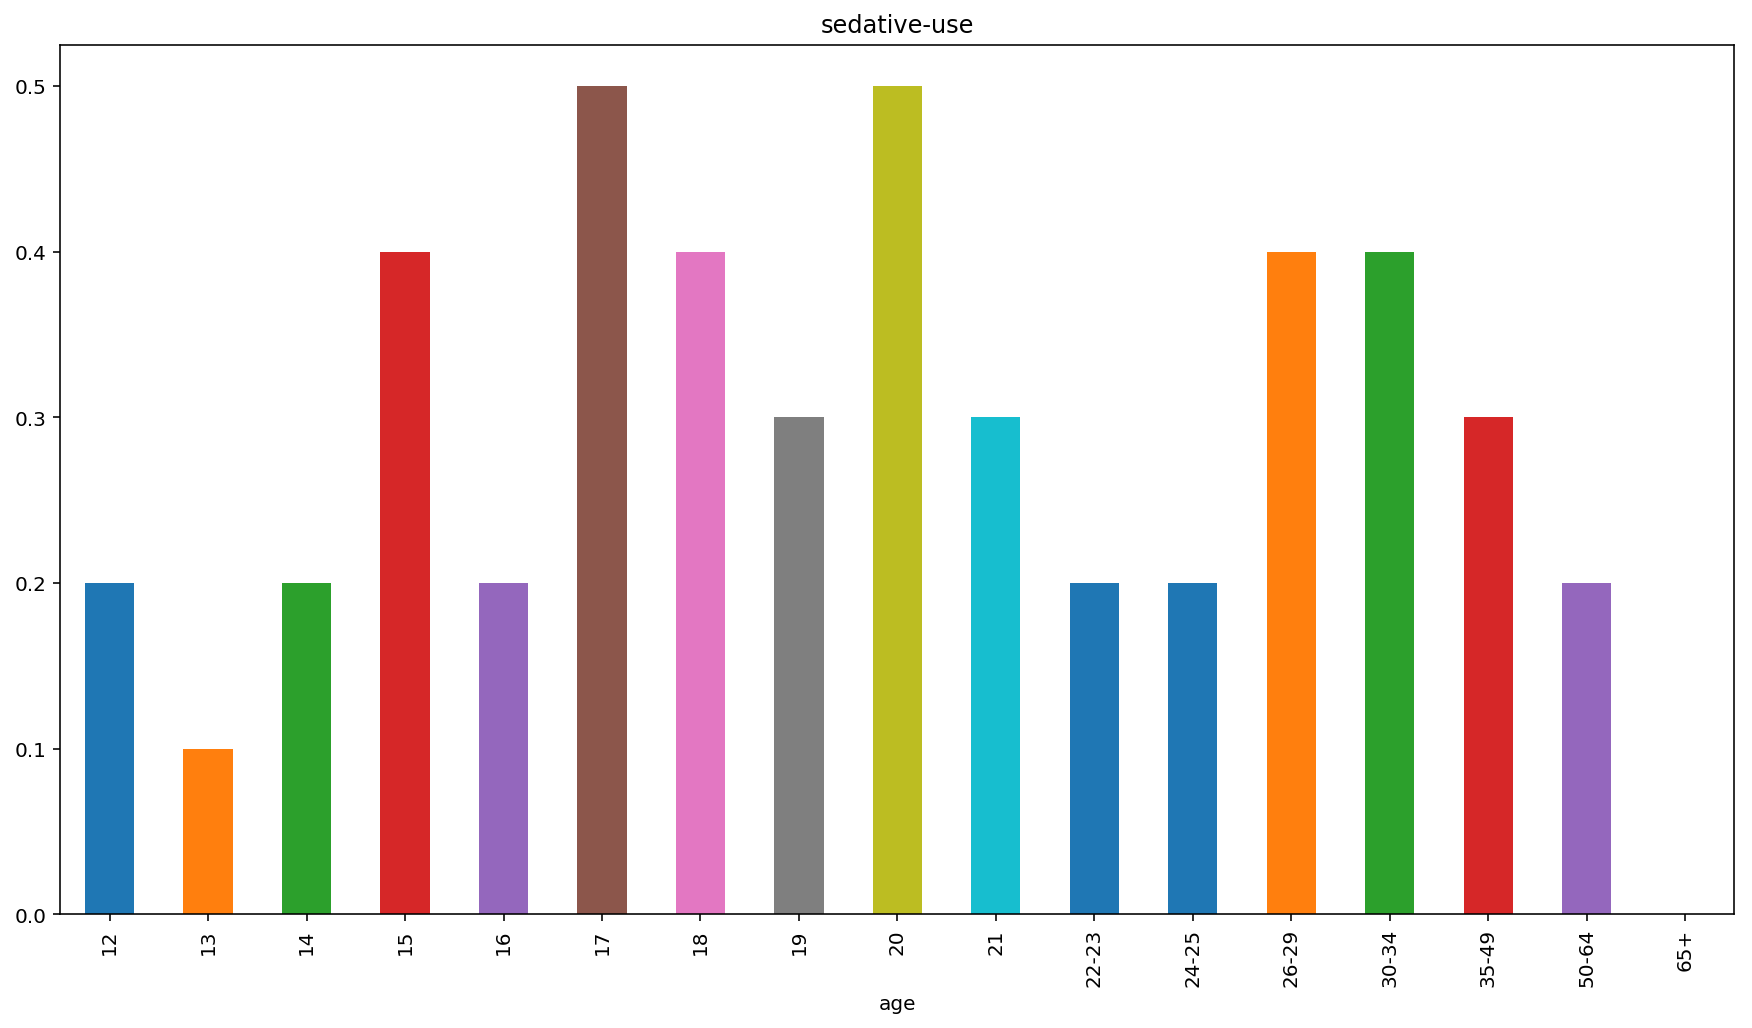

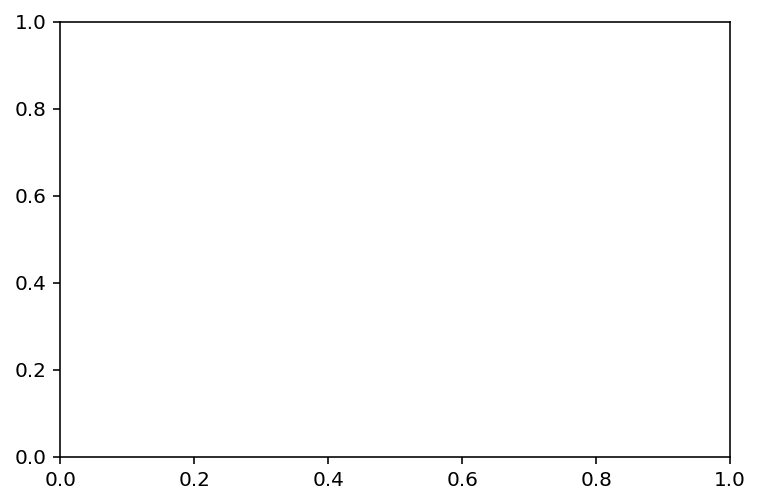

In [42]:
#Individual plots for further investigation
for i in range(len(druguse.columns)-1):
    druguse.loc[:,druguse.columns[i+1]].plot(kind='bar', figsize=(15,8), title=druguse.columns[i+1])
    plt.subplots()

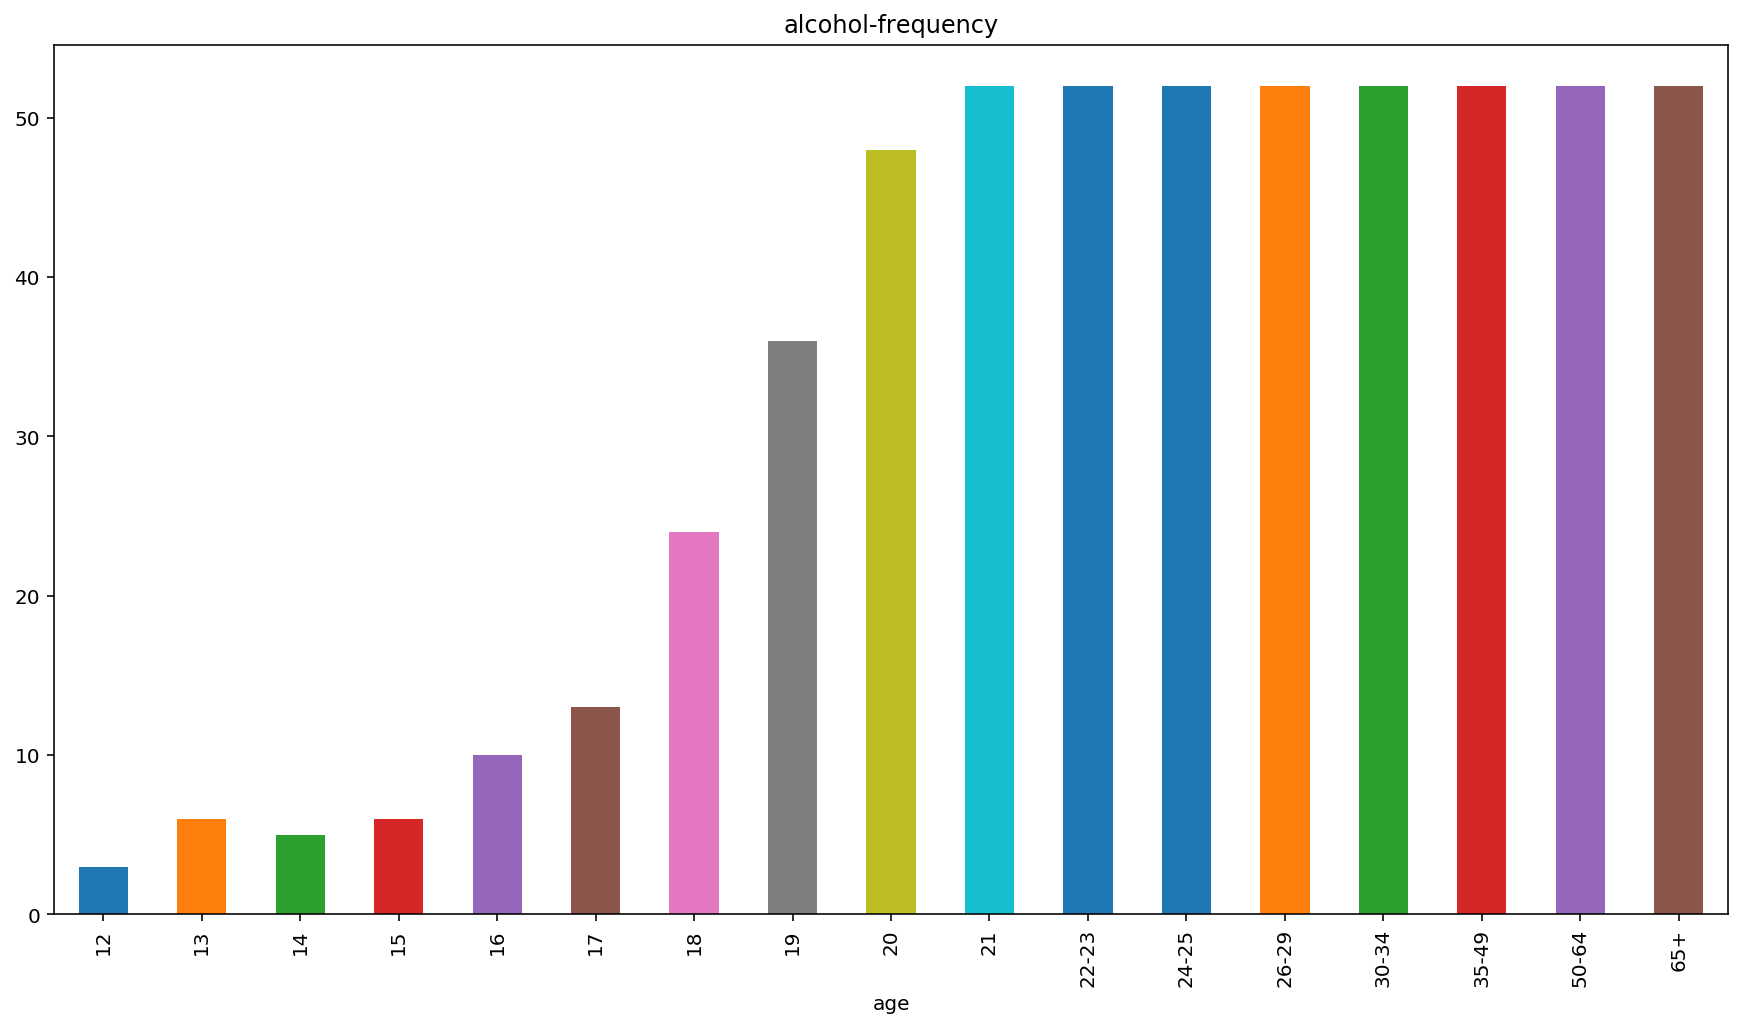

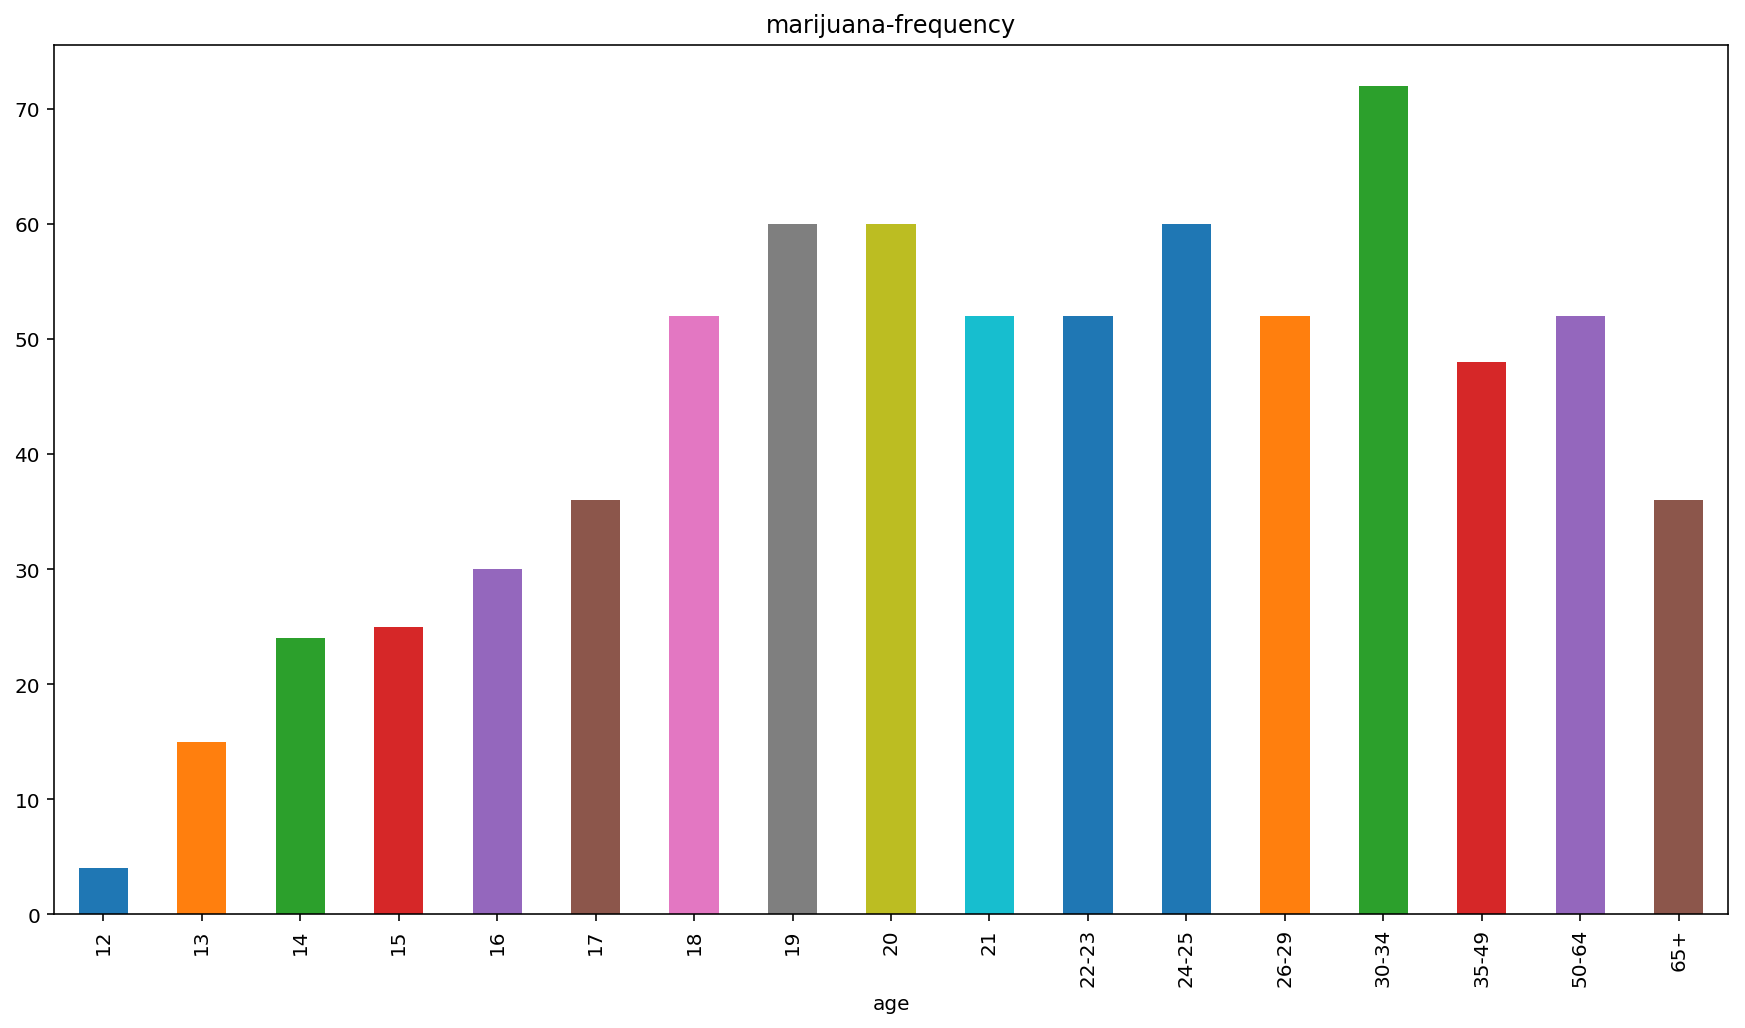

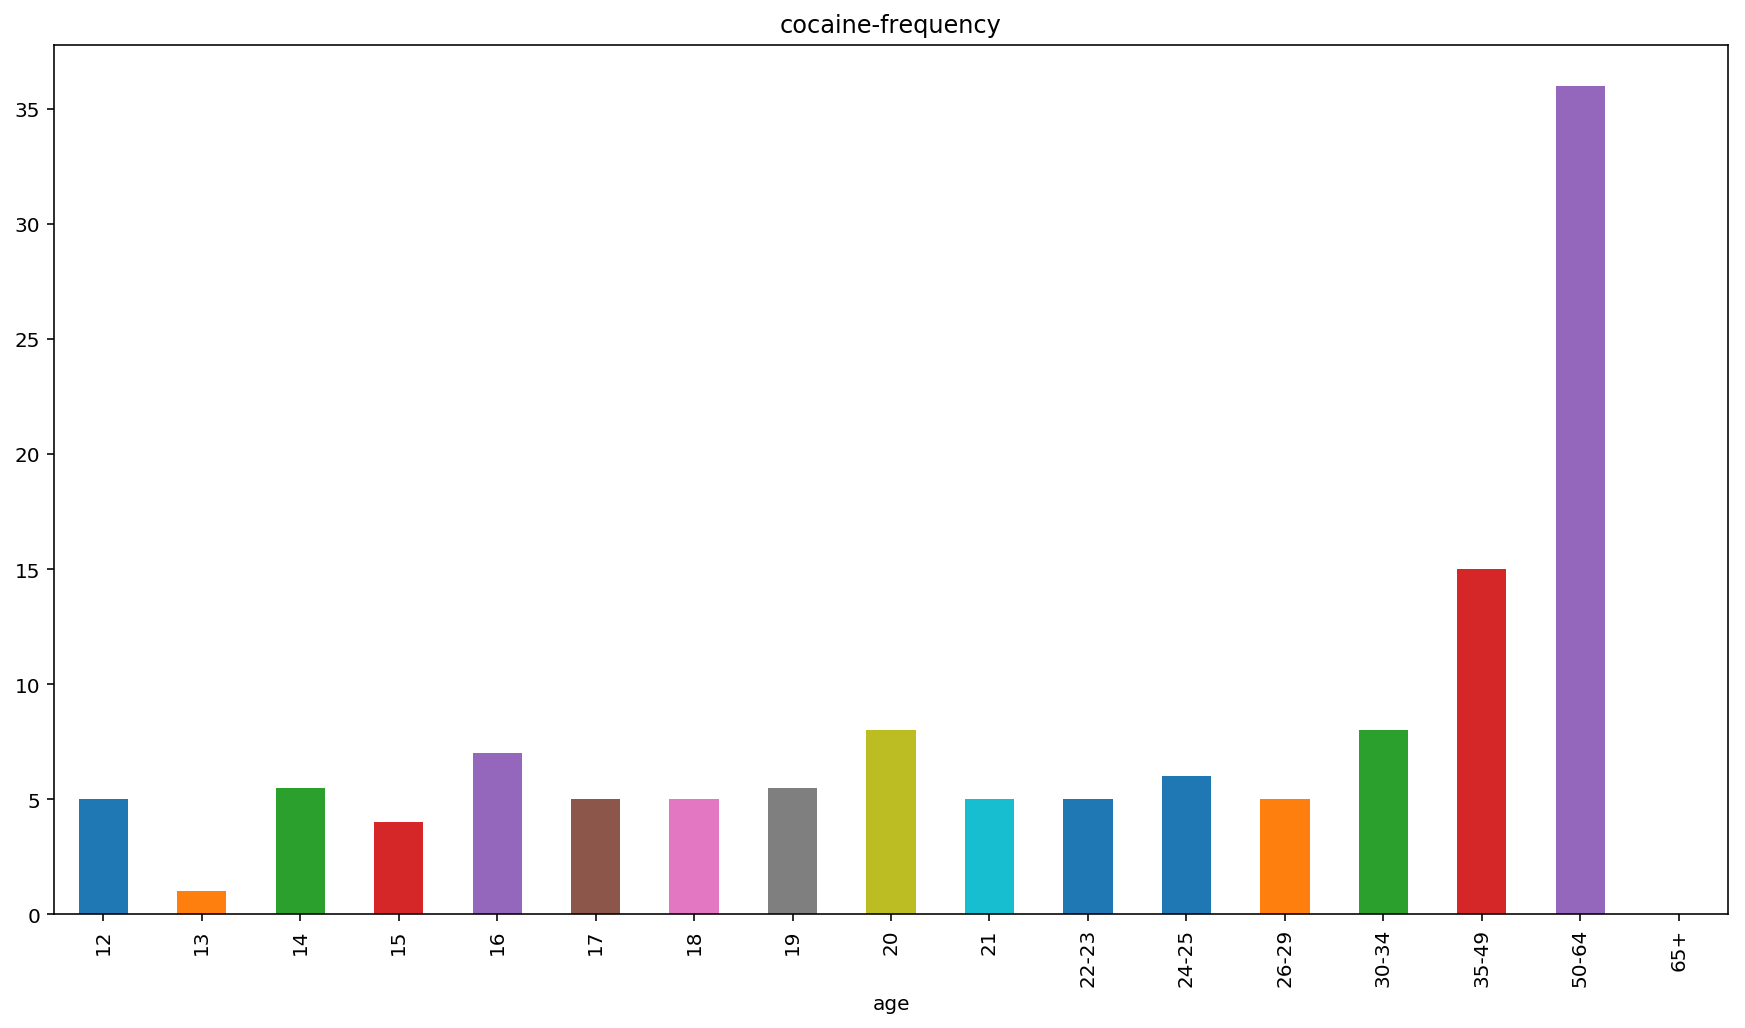

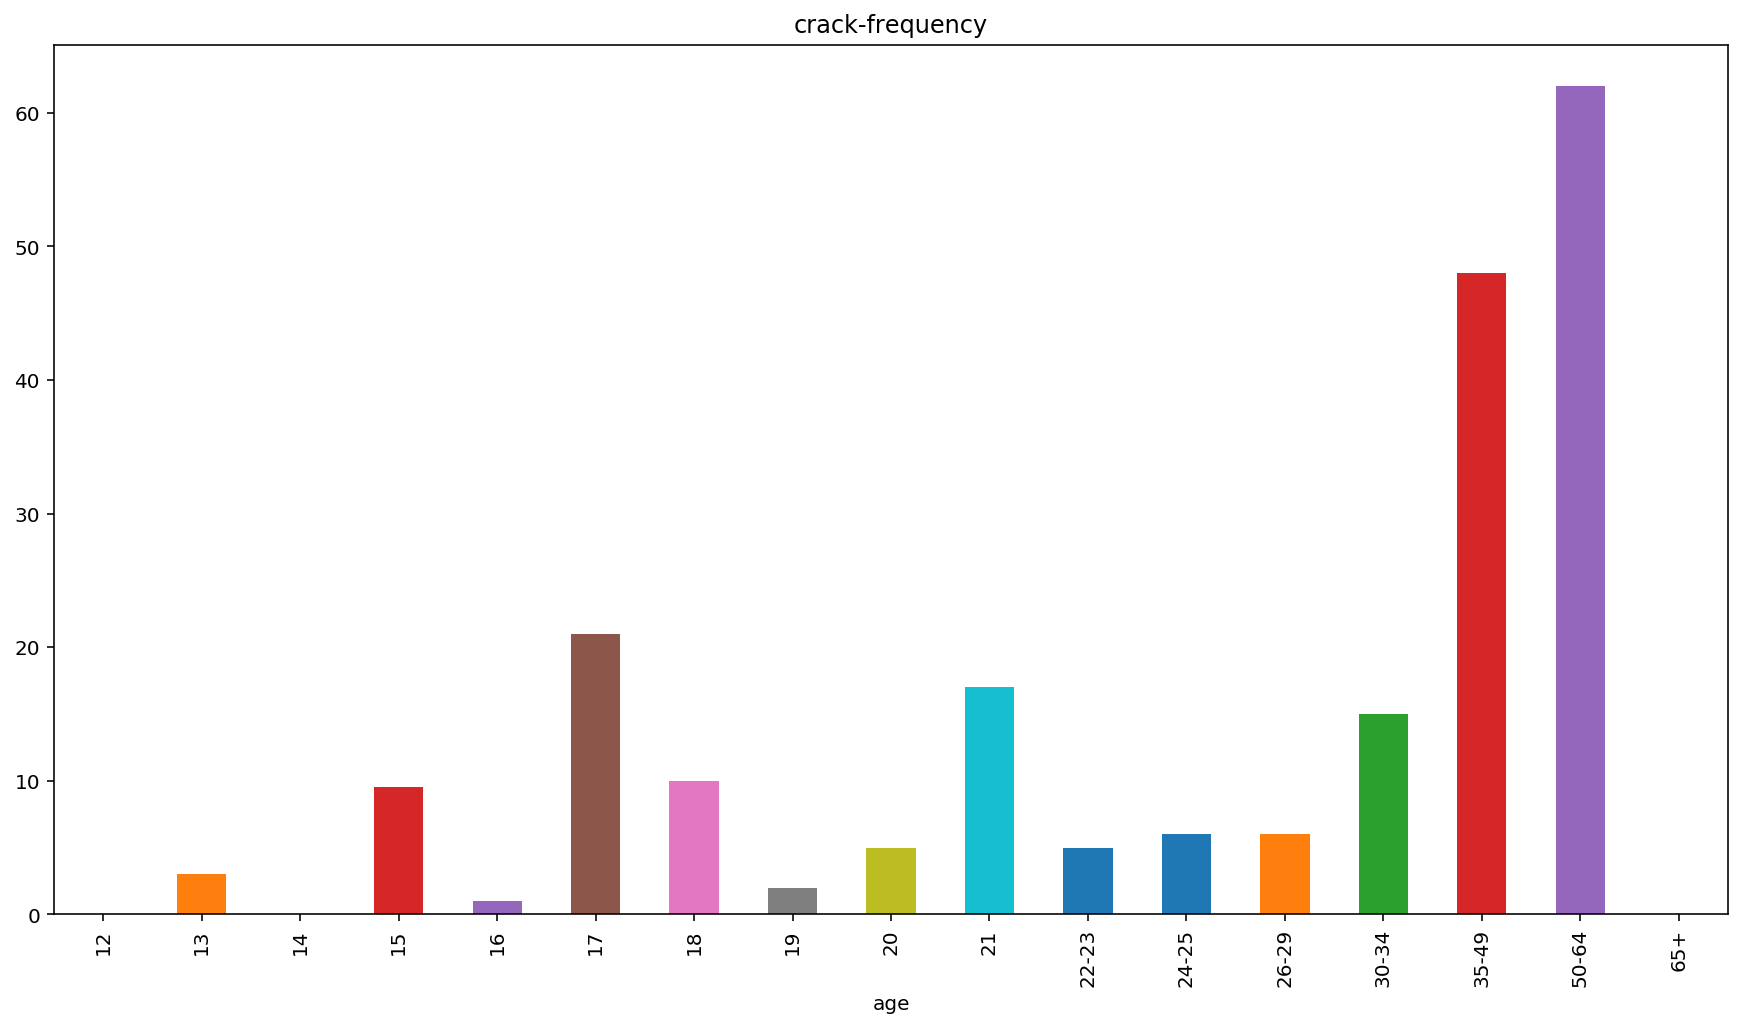

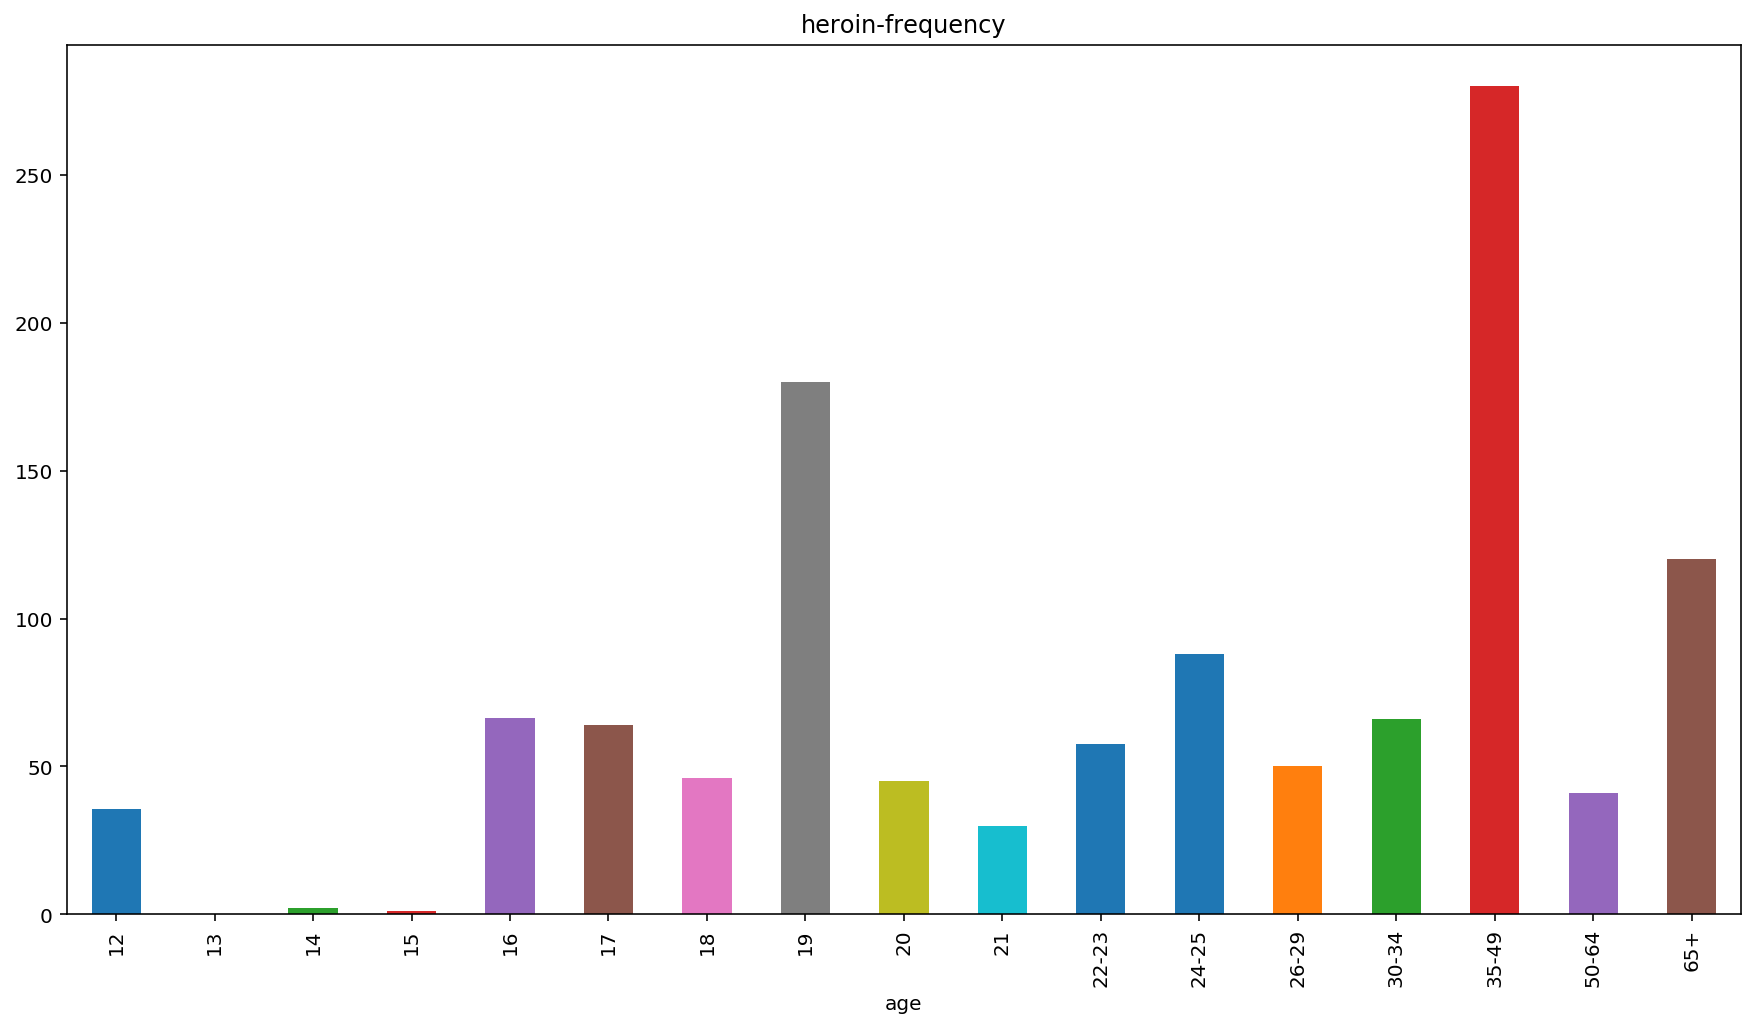

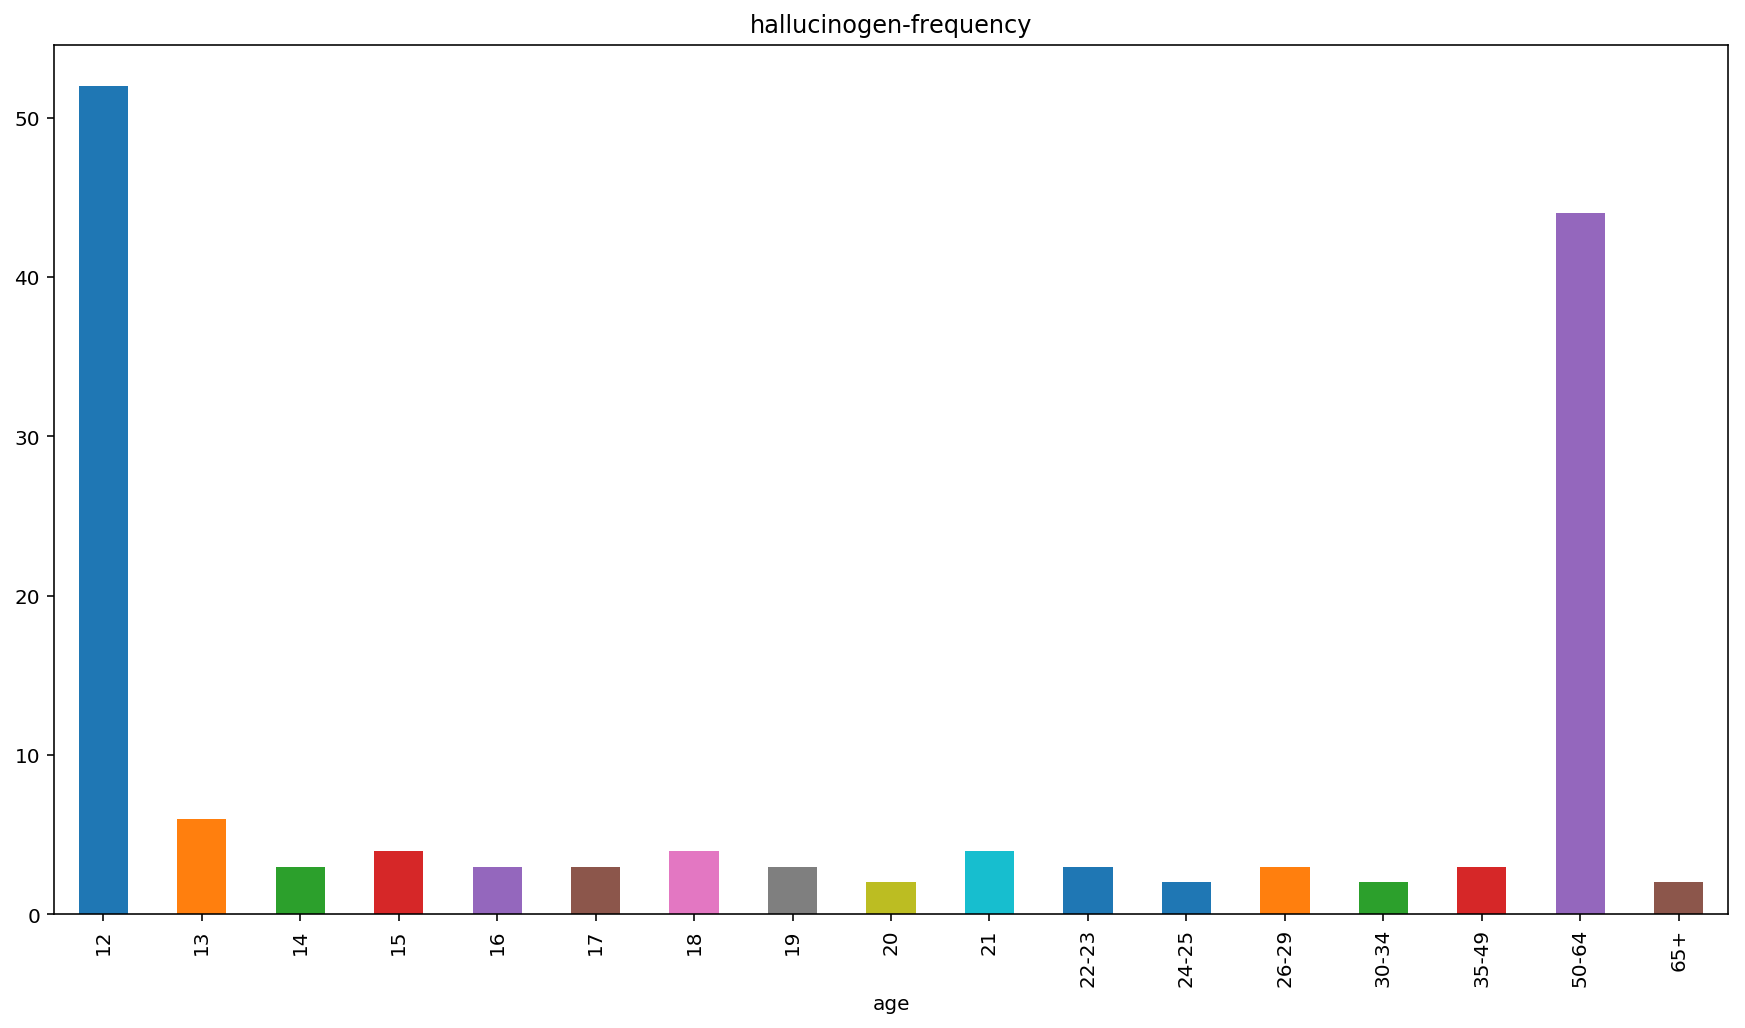

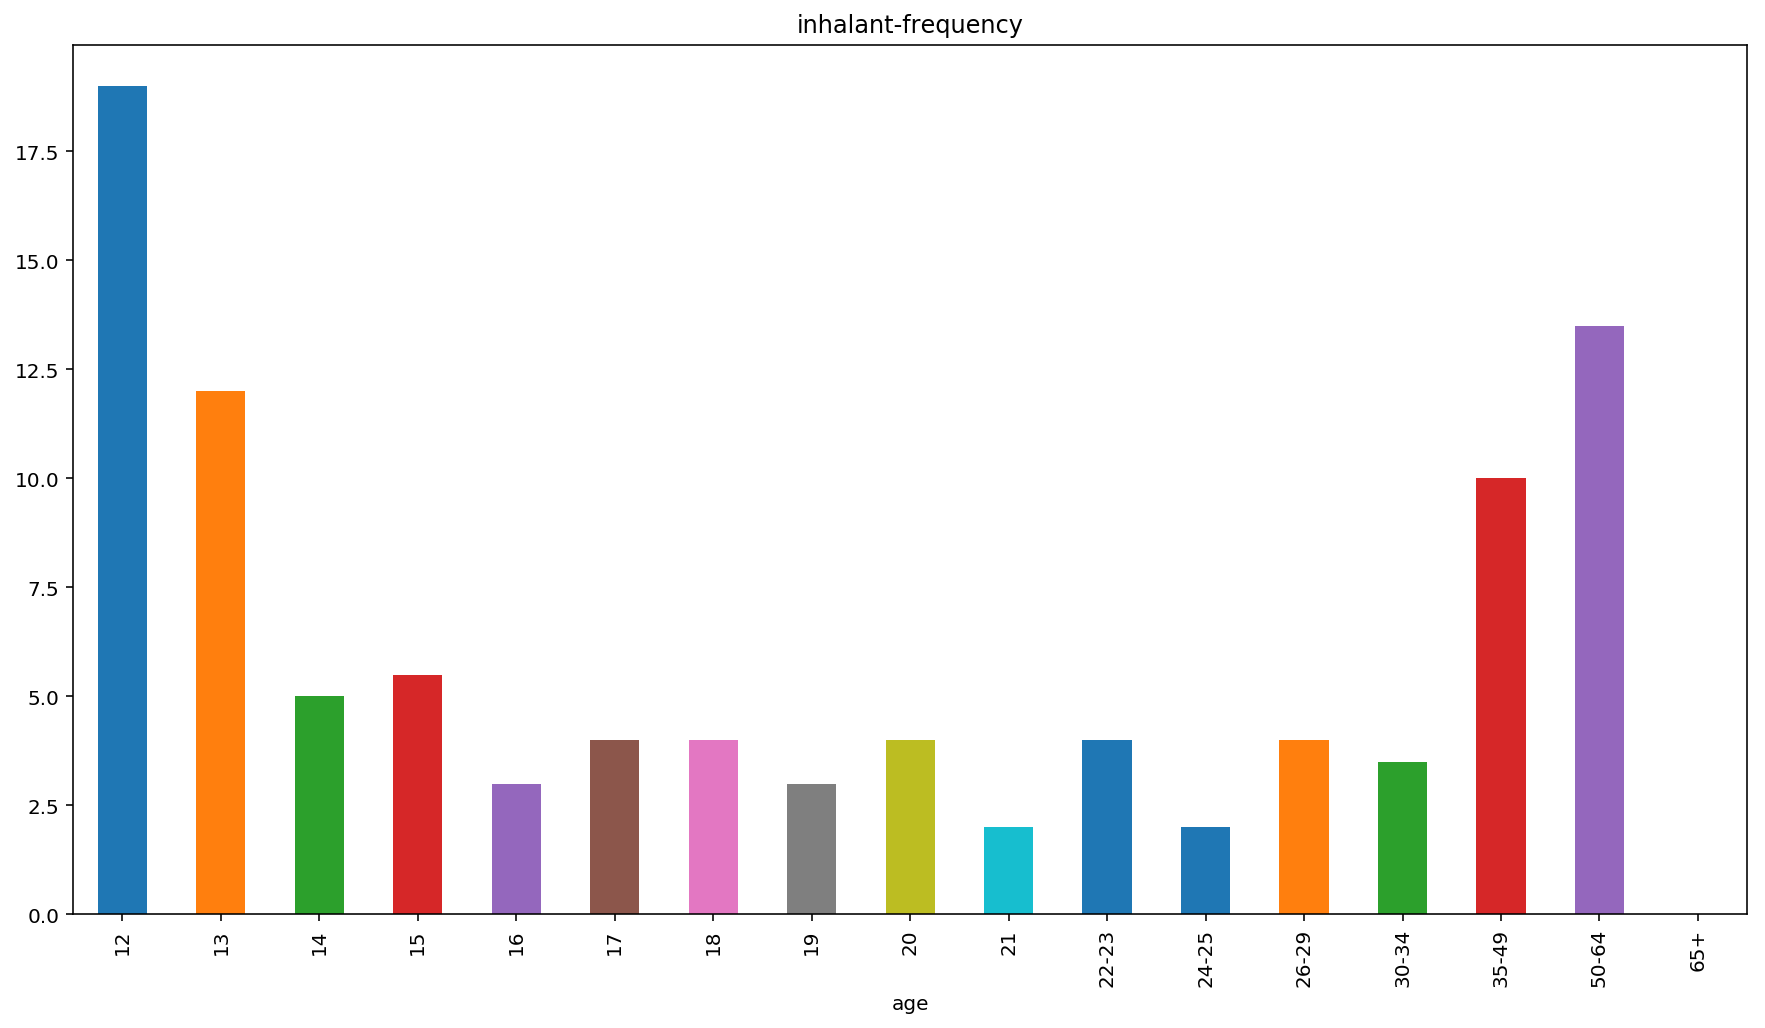

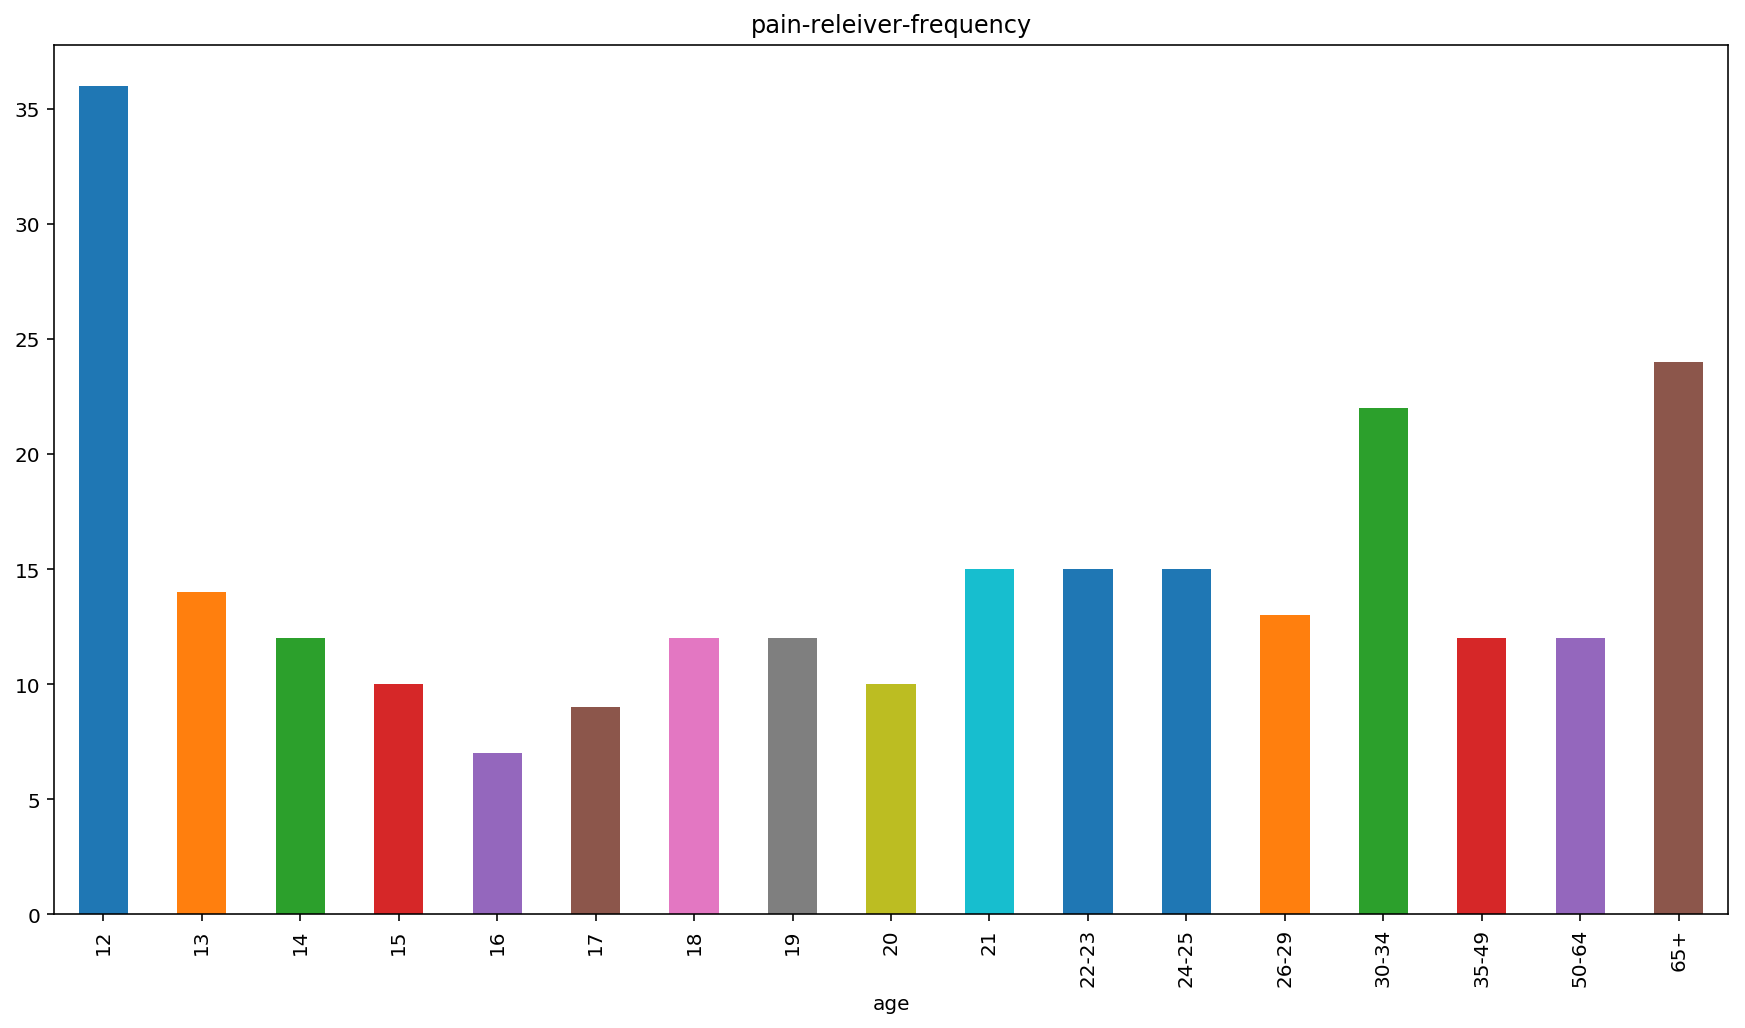

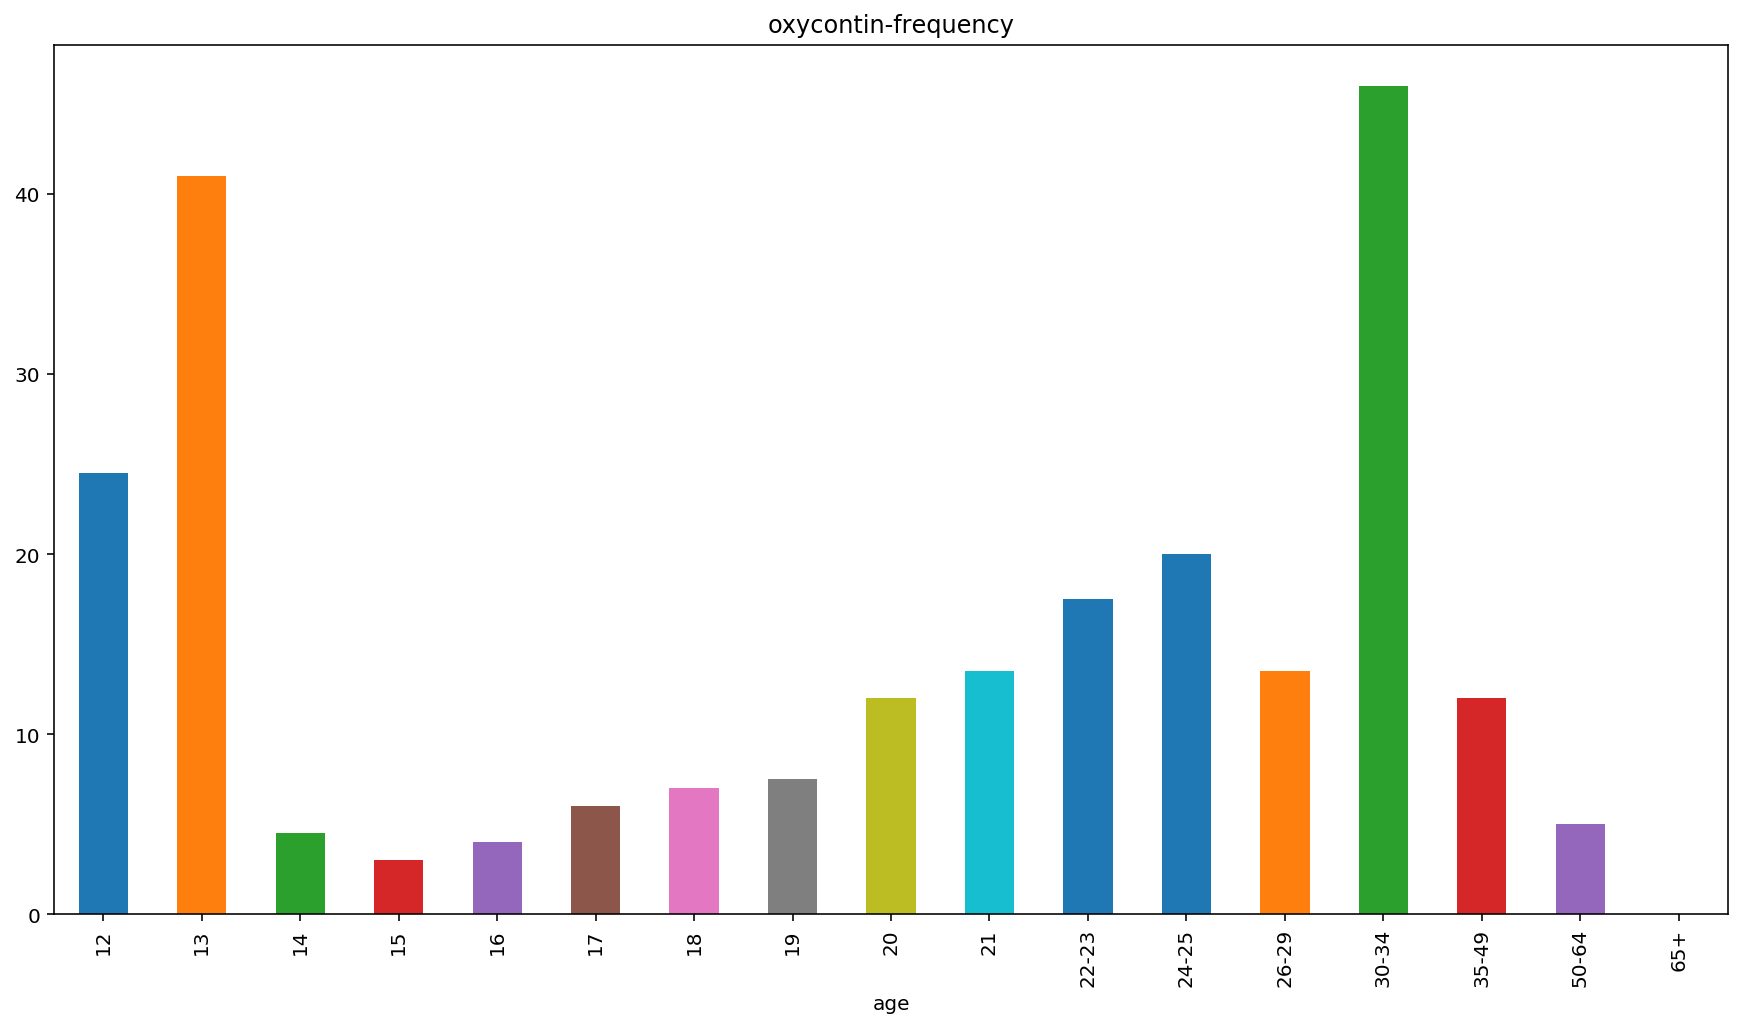

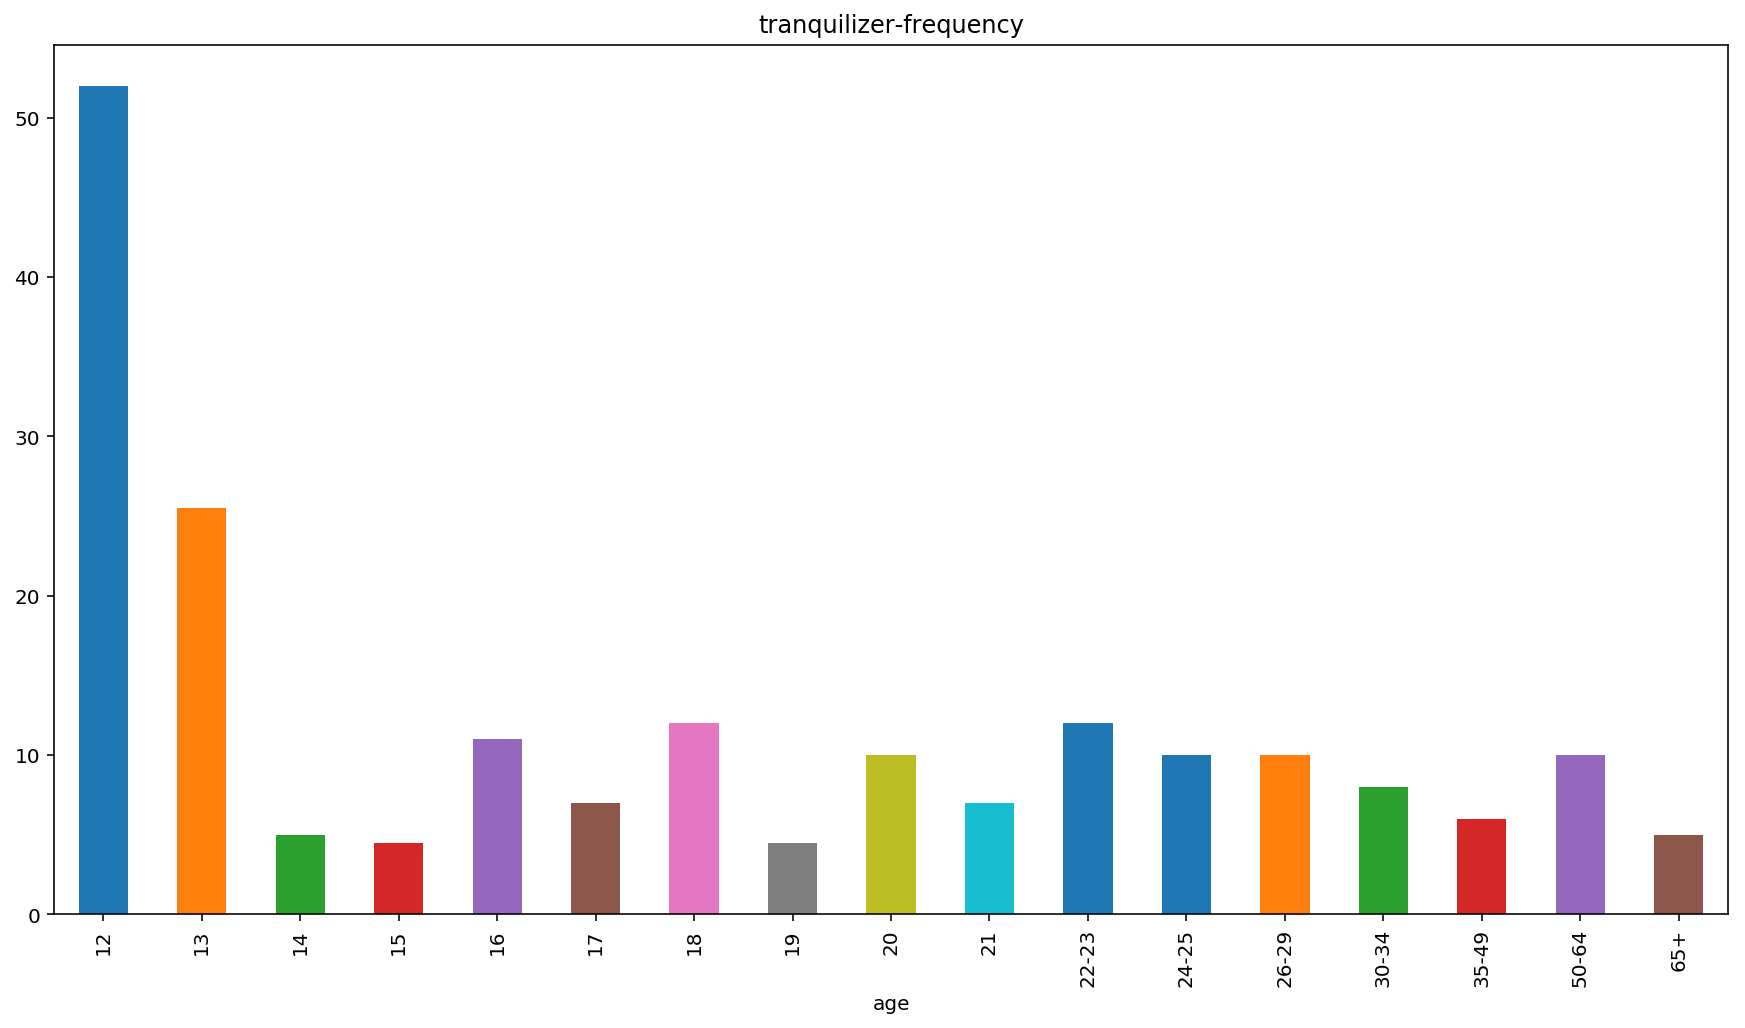

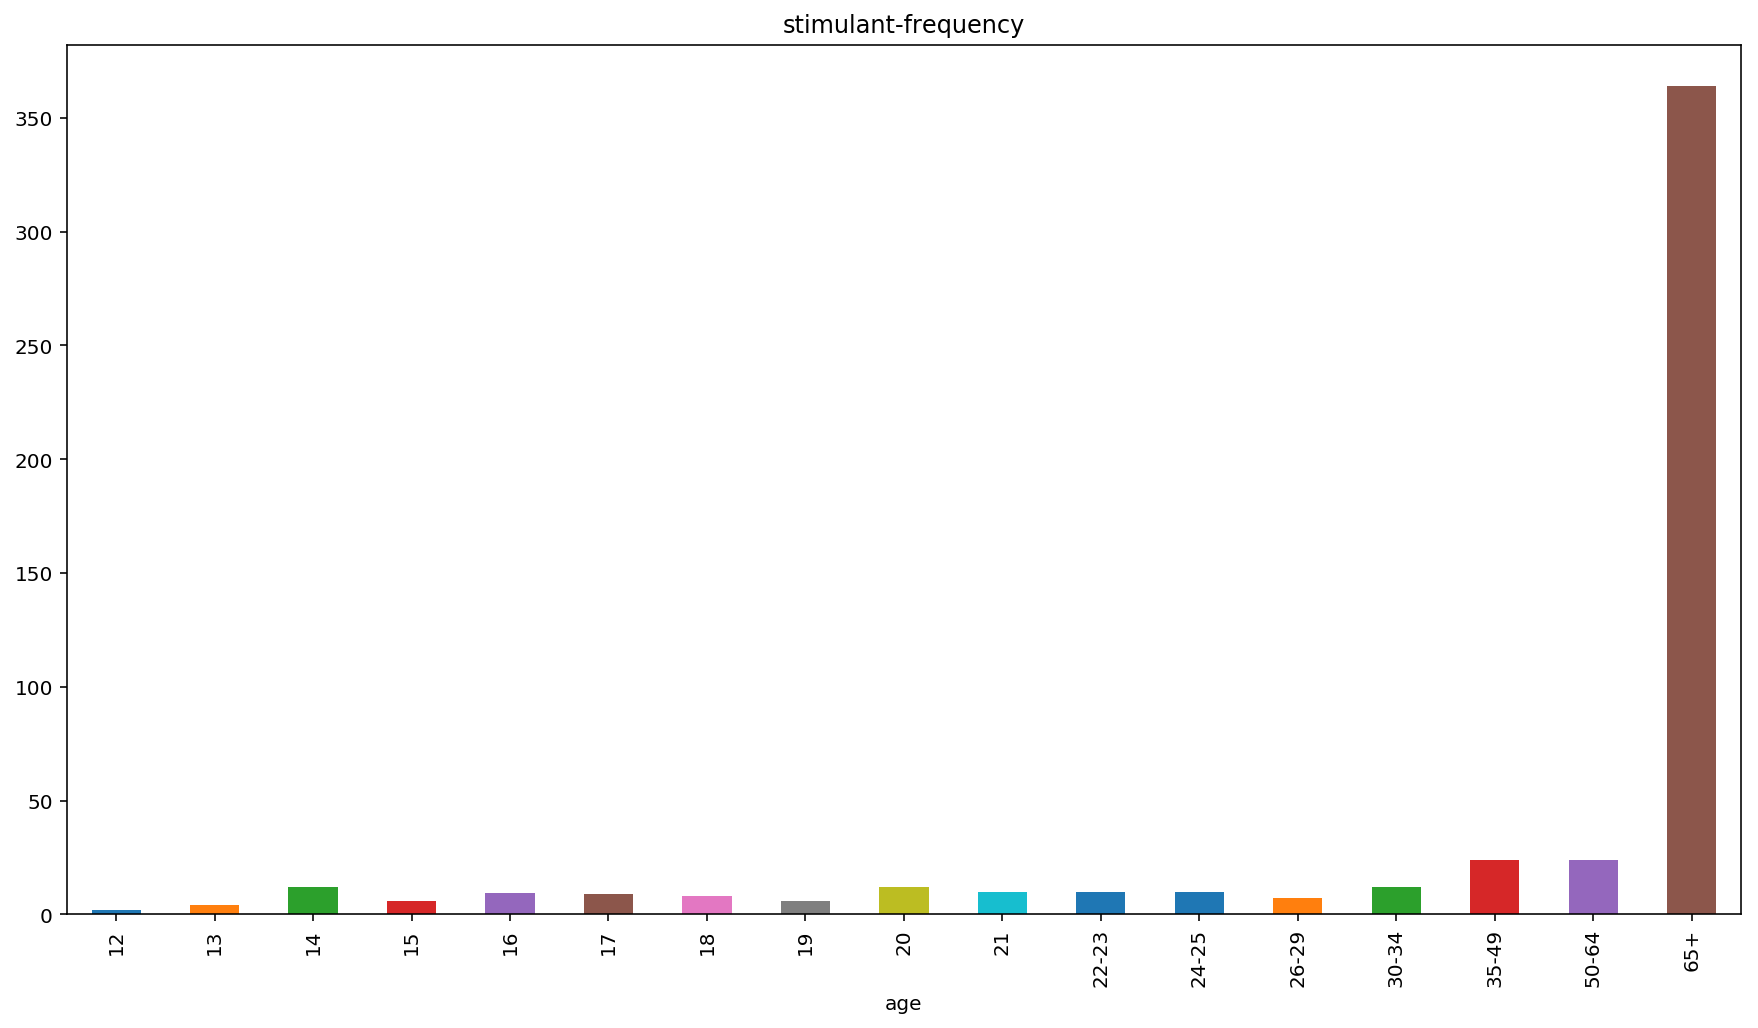

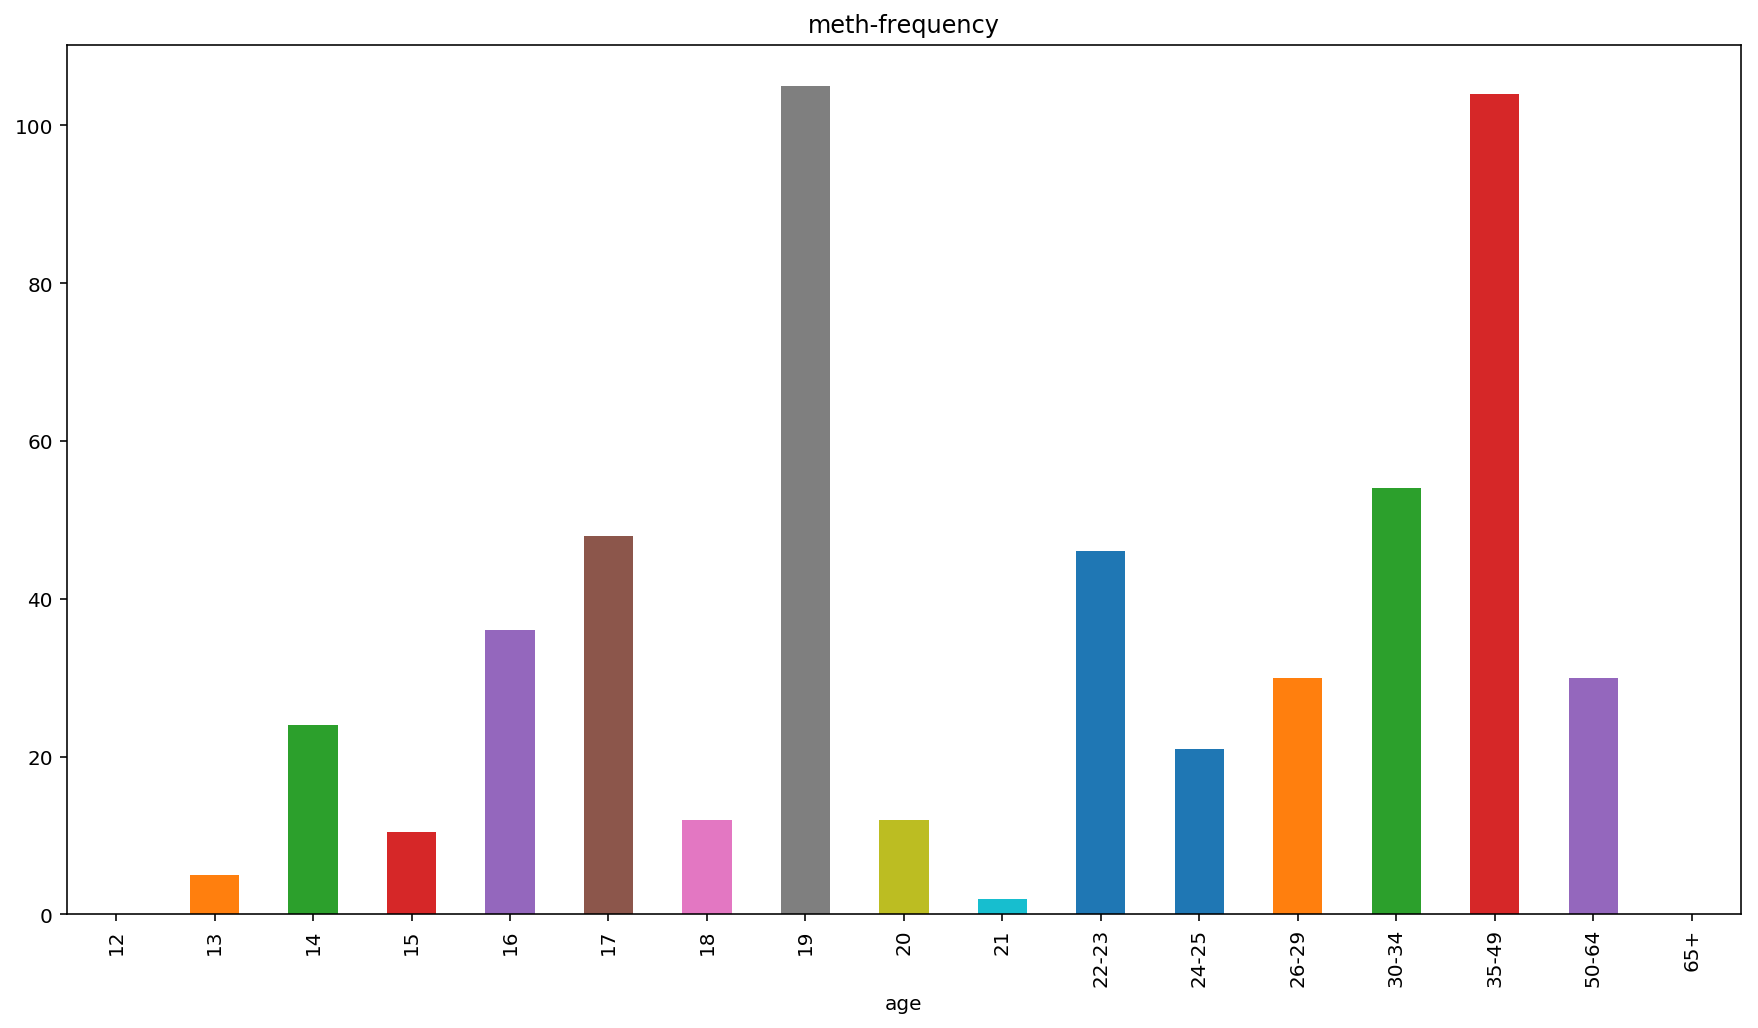

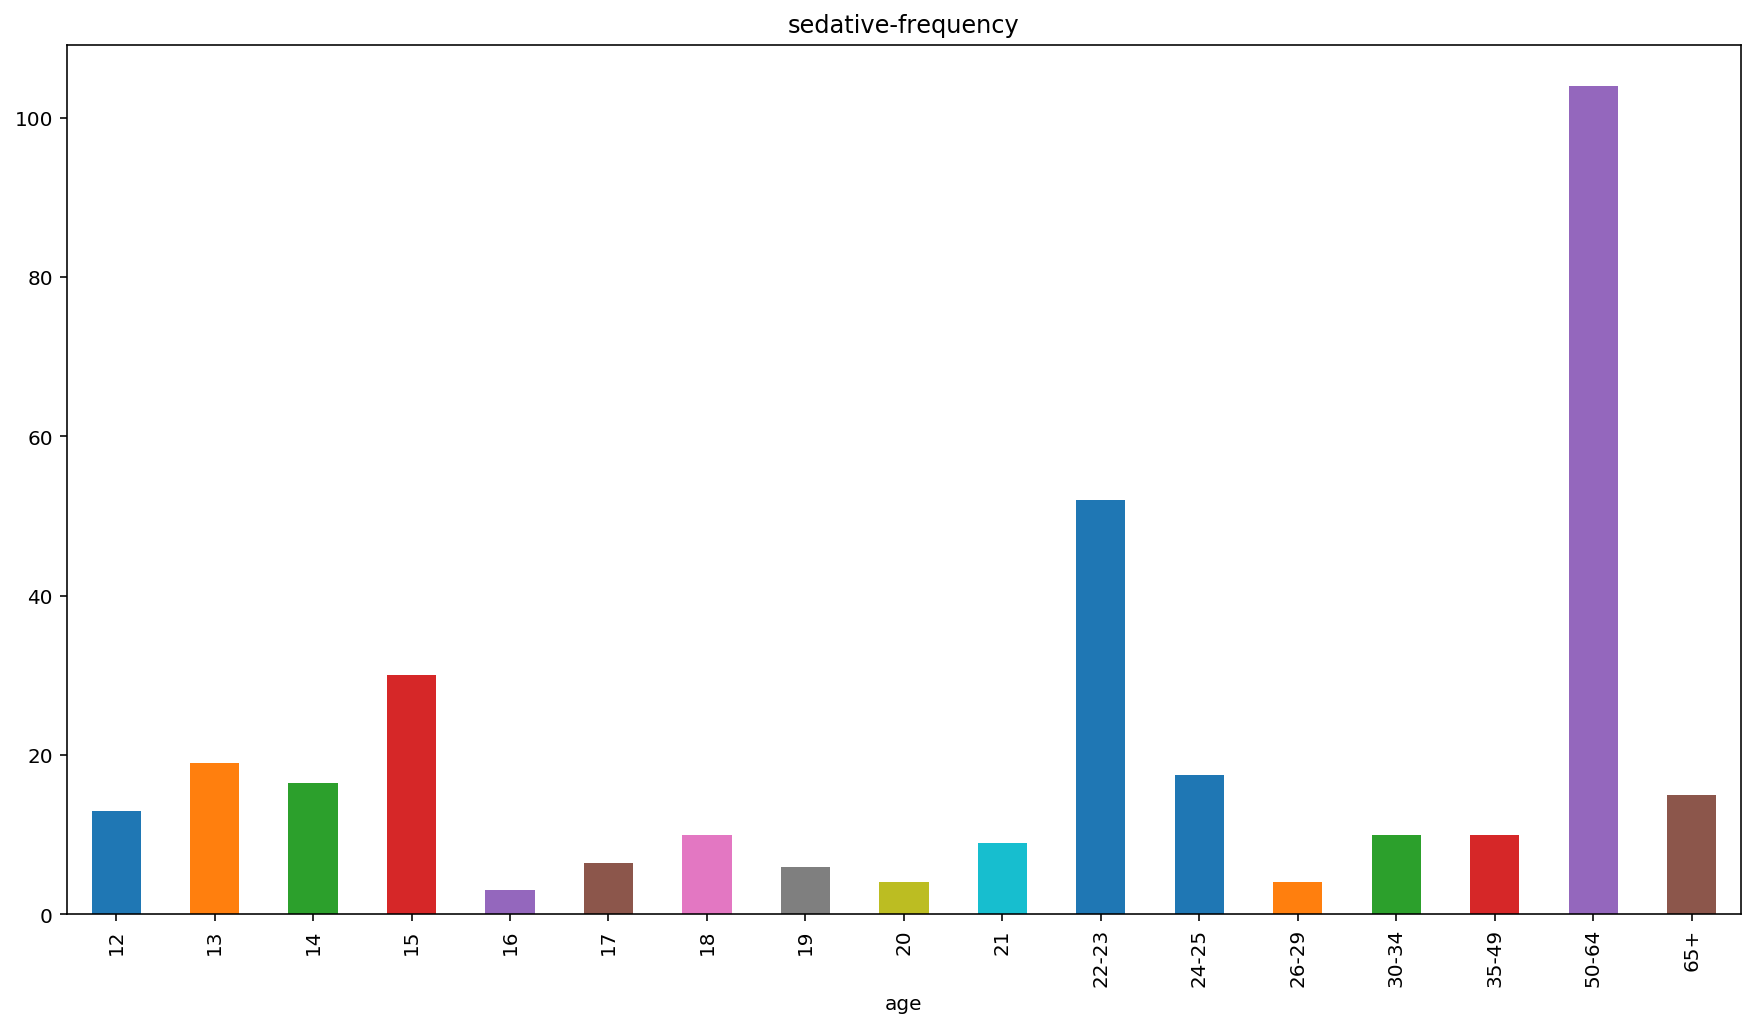

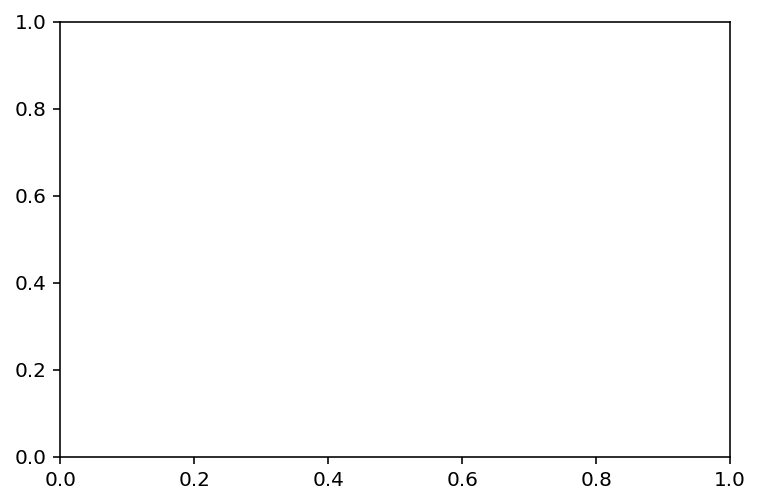

In [36]:
#Individual plots for further investigation
for i in range(len(drugmed.columns)-1):
    drugmed.loc[:,drugmed.columns[i+1]].plot(kind='bar', figsize=(15,8), title=drugmed.columns[i+1])
    plt.subplots()

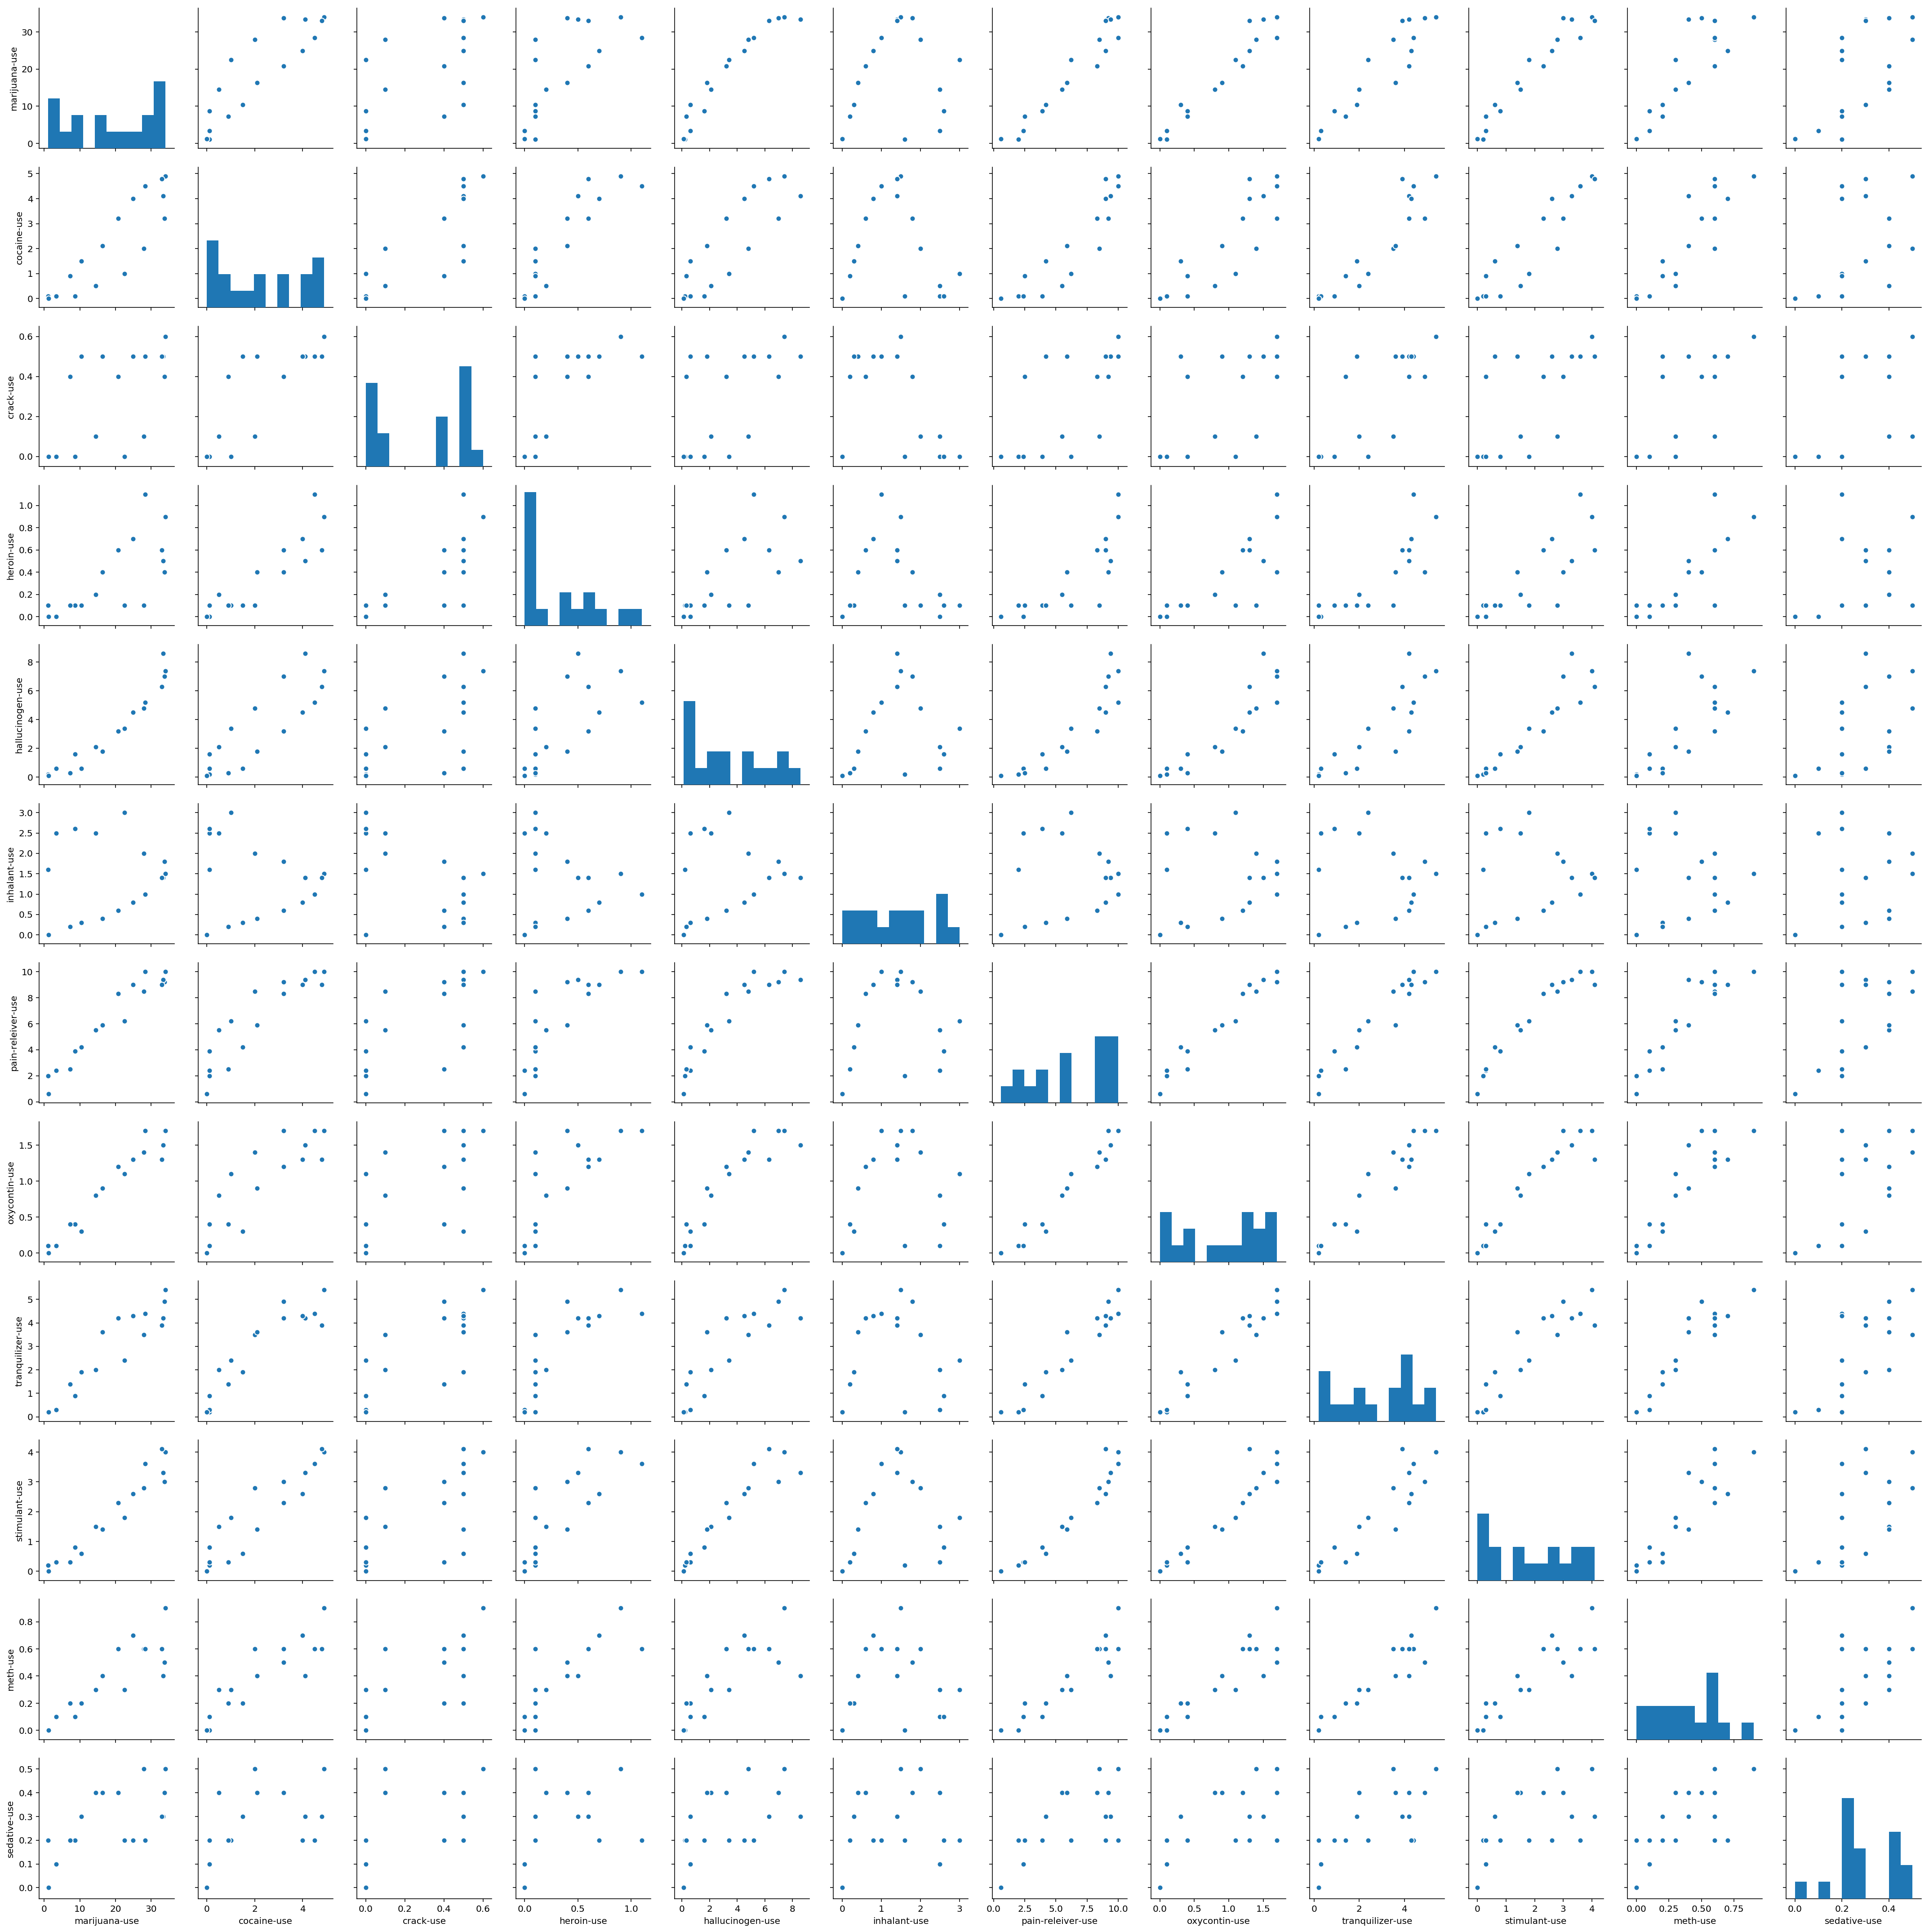

In [37]:
#Most drug usage seem to have a positive correlation across the age groups
sns.pairplot(druguse.iloc[:,2:])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [44]:
#age most susceptible to drug abuse is between 19-23 and youth at these age should be our target group for drug abuse campaigns

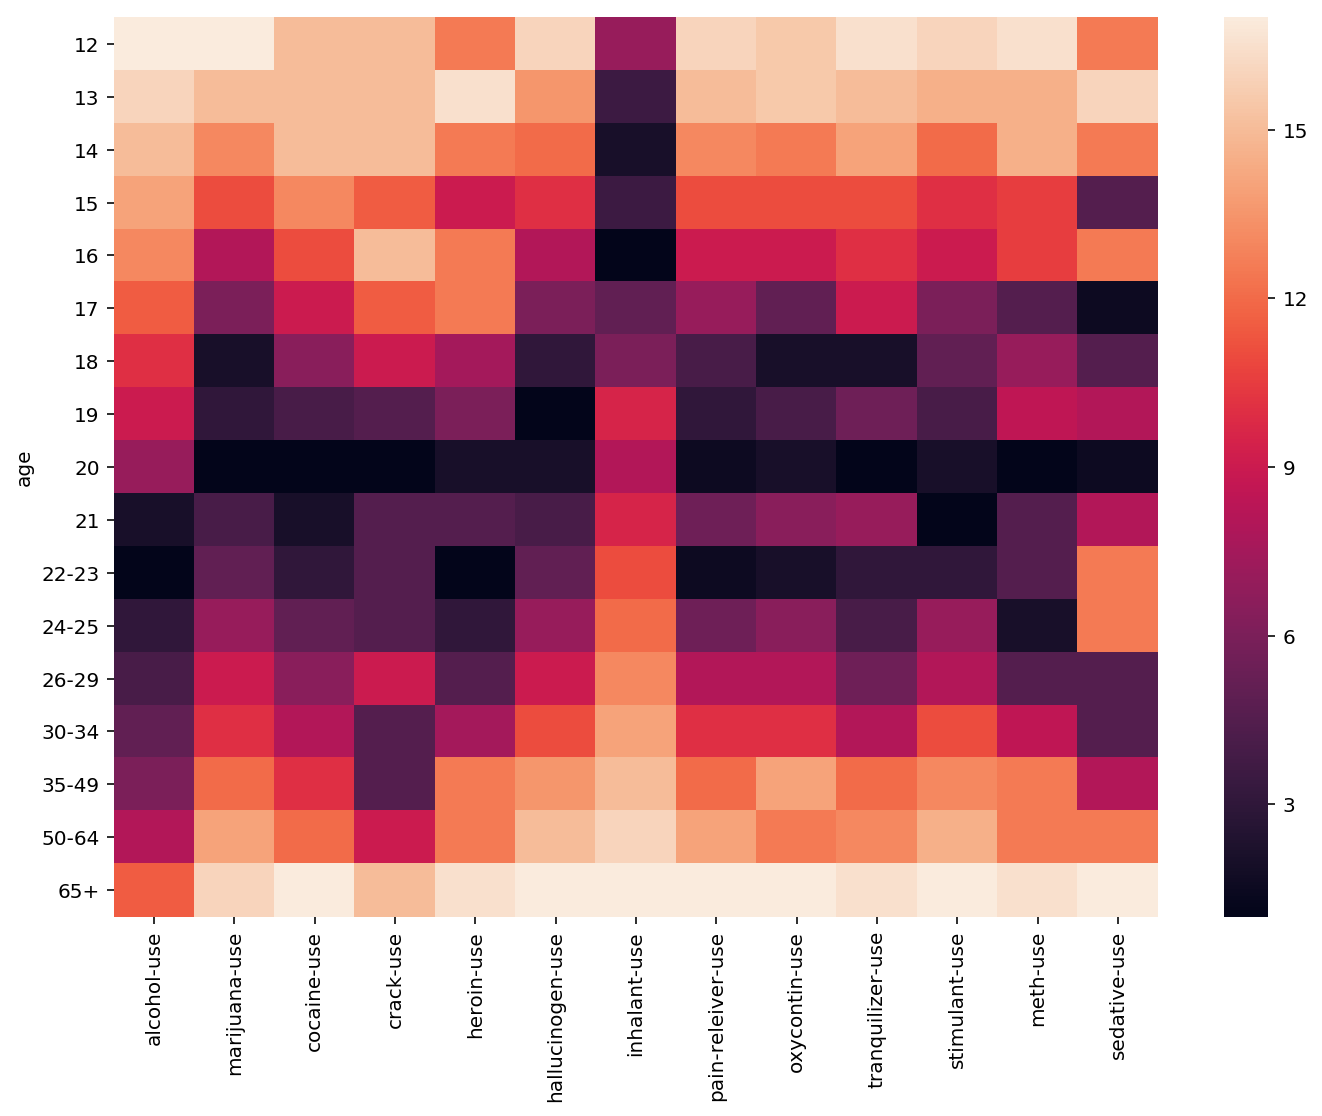

In [45]:
#Rank each age group according to the proportion of drug users for every drug present
#The highest proportion will have a lowest rank score
druguserank = druguse.iloc[:,1:].rank(ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(druguserank)
#we observe that other than alcohol-use, inhalant-use and sedative-use, age 19-23 have the darkest patch (lowest rank) for drug-use.

In [46]:
druguserank.sum(axis=1).sort_values(ascending=True)
#summing rank values to have an aggregate score of drug abuse across all drug types
#we can see that the early adult age range has the lowest rank score (highest proportion of drug abuse across all drug types)

age
20        31.0
22-23     57.0
21        63.0
18        68.5
19        70.0
24-25     79.0
26-29     93.5
17        94.5
30-34    112.0
16       128.5
15       130.0
35-49    145.0
14       163.0
50-64    165.5
13       185.0
12       192.5
65+      211.0
dtype: float64

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

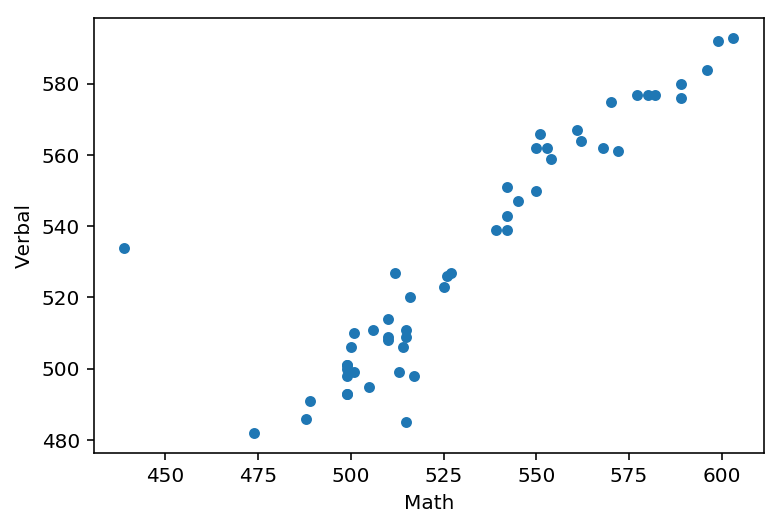

In [50]:
#pull rate variable out
satdf_norate = satdf.iloc[:,satdf.columns != 'Rate']
#plotting of math and verabl scatterplot
satdf_norate.plot('Math','Verbal',kind='scatter')
#we can observe one outlier (State:OH, Verbal score: 534,  Math score: 439)

In [51]:
#Getting the absolute value difference between Math and Verbal scores as an outlier metric
satdf_norate['mathverbaldiff'] = abs(satdf_norate['Verbal'] - satdf_norate['Math'])

   State  Verbal  Math  VMdiff  mathverbaldiff
21    HI     485   515     -30              30
27    OH     534   439      95              95
Empty DataFrame
Columns: [State, Verbal, Math, VMdiff, mathverbaldiff]
Index: []


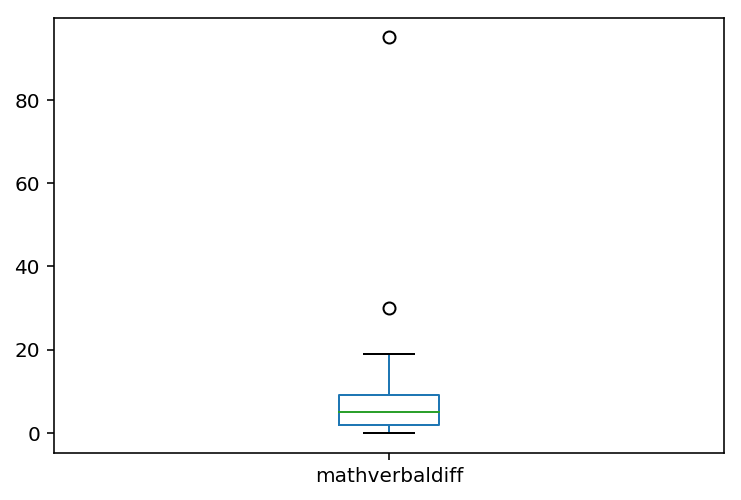

In [52]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = satdf_norate['mathverbaldiff'].quantile(0.25)
Q3 = satdf_norate['mathverbaldiff'].quantile(0.75)
IQR = Q3 - Q1

print satdf_norate[satdf_norate['mathverbaldiff'] >= Q3+1.5*IQR]
print satdf_norate[satdf_norate['mathverbaldiff'] <= Q1-1.5*IQR]
#States HI and OH have high math and verbal score differences (greater than Q3+1.5*IQR)
satdf_norate['mathverbaldiff'].plot(kind='box')

In [74]:
#dataframe without outliers
satdf_norate_nooutlier = satdf_norate[~satdf_norate['State'].isin(['HI','OH'])]

#get statistics of previous dataframe and new dataframe without outliers
print("original verbal mean: {} new verbal mean: {}".format(satdf_norate['Verbal'].mean(), satdf_norate_nooutlier['Verbal'].mean()))
print("original verbal median: {} new verbal median: {}".format(satdf_norate['Verbal'].median(), satdf_norate_nooutlier['Verbal'].median()))
print("original verbal stdev: {} new verbal stdev: {}".format(satdf_norate['Verbal'].std(), satdf_norate_nooutlier['Verbal'].std()))

print("original math mean: {} new math mean: {}".format(satdf_norate['Math'].mean(), satdf_norate_nooutlier['Math'].mean()))
print("original math median: {} new math median: {}".format(satdf_norate['Math'].median(), satdf_norate_nooutlier['Math'].median()))
print("original math stdev: {} new math stdev: {}".format(satdf_norate['Math'].std(), satdf_norate_nooutlier['Math'].std()))

#no significant changes. largest change is in the standard deviations. less variation after removal of outlier.

original verbal mean: 532.019230769 new verbal mean: 532.92
original verbal median: 526.5 new verbal median: 526.5
original verbal stdev: 33.2362254438 new verbal stdev: 33.2220973917
original math mean: 531.5 new math mean: 533.68
original math median: 521.0 new math median: 525.5
original math stdev: 36.0149750989 new math stdev: 34.1320604567


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [45]:
#Spearman is used on ordinal variables while pearson is used on continuous variables
#Variable with n values are ranked in the order from 1 to n. The difference between ranked values of two corresponding variables are squared...
#... spearman correlation takes 1 - (squared difference divided by n(n**2-1). The greater the difference, the smaller the correlation.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [77]:
satdf['rate_pctl'] = satdf['Rate'].apply(lambda x: stats.percentileofscore(satdf['Rate'], x))

In [78]:
satdf[satdf['State'] == 'CA']
#it is used as the rank for California for the correlation calculation

State  Rate  Verbal  Math  VMdiff  rate_pctl
23    CA    51     498   517     -19  56.730769

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [79]:
druguse['marijuana_use_pctl'] = druguse['marijuana-use'].apply(lambda x: stats.percentileofscore(druguse['marijuana-use'], x))

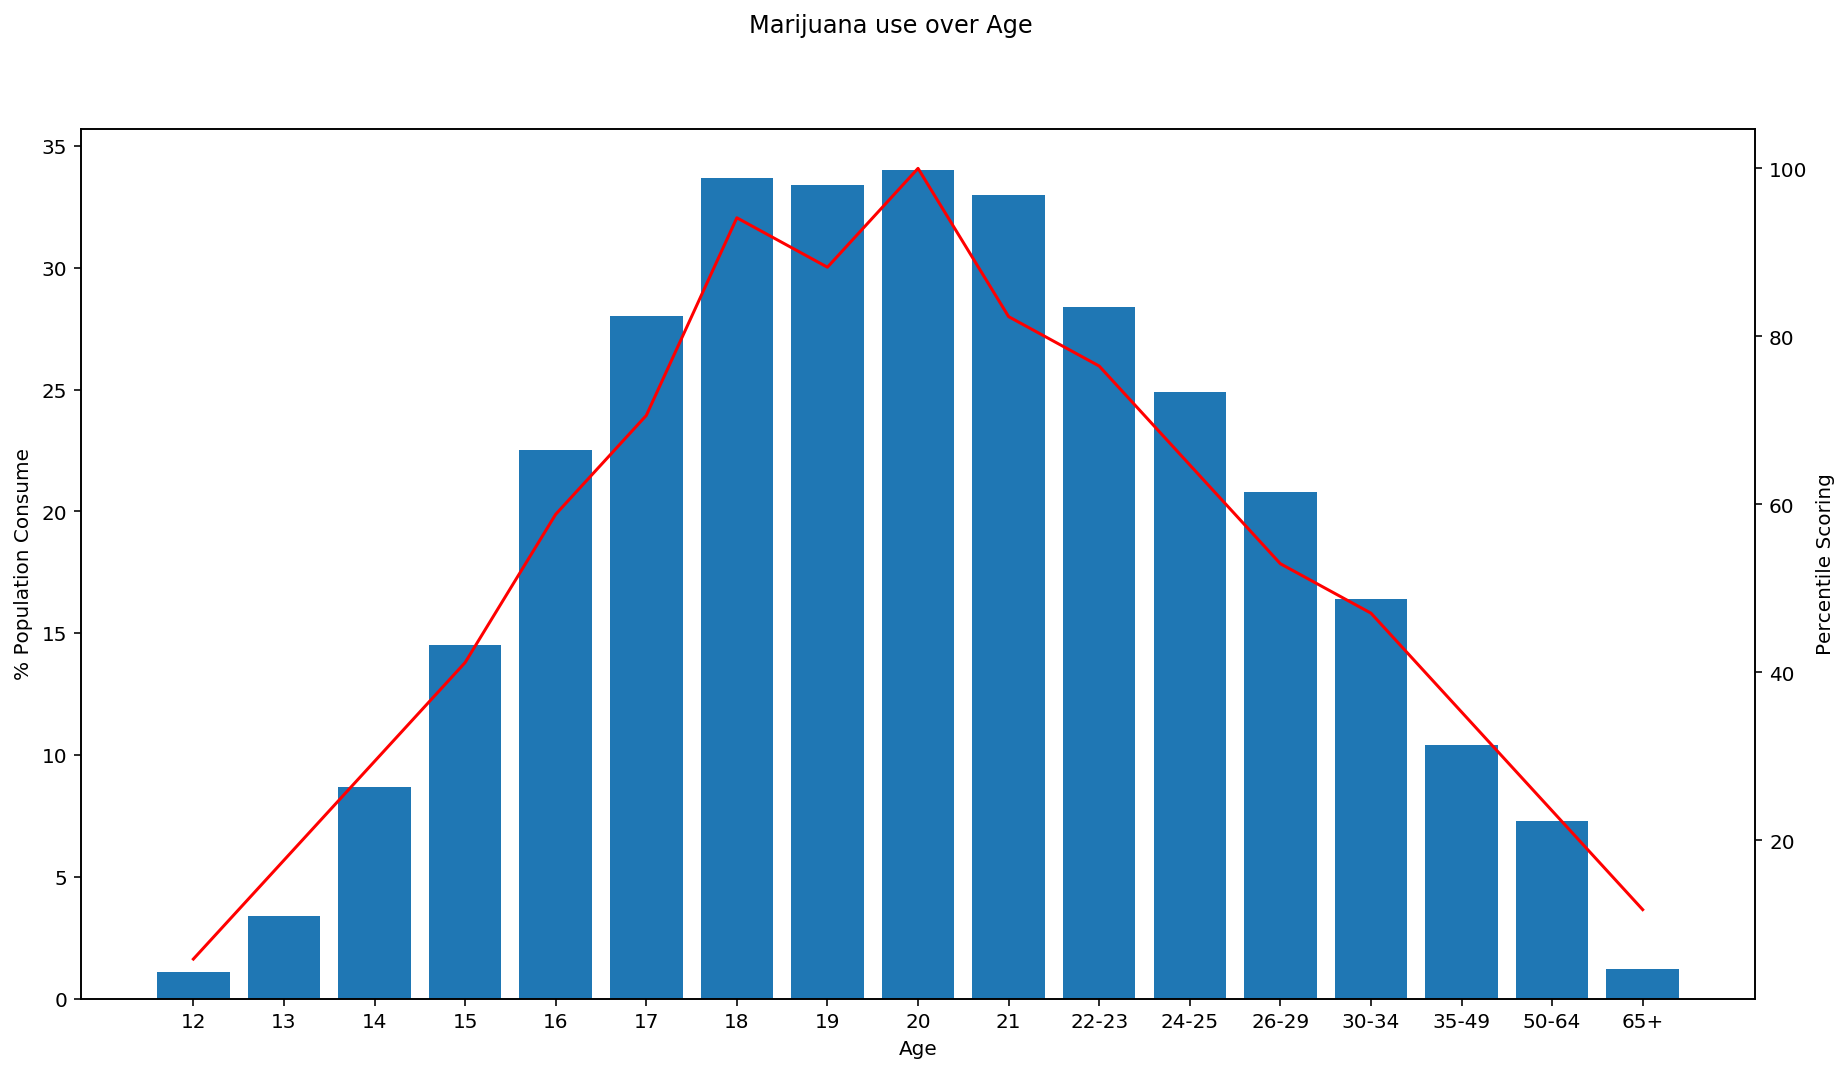

In [80]:
fig,ax1 = plt.subplots(figsize=(15,8))
fig.suptitle('Marijuana use over Age')
ax1.set_xlabel('Age')


#plot the first graph 
xaxis = druguse.index.values
ax1.bar(xaxis ,druguse['marijuana-use'])
ax1.set_ylabel('% Population Consume')

#share x-axis 
ax2 = ax1.twinx() 

#plot the second graph
ax2.plot(druguse['marijuana_use_pctl'],'r');
ax2.set_ylabel('Percentile Scoring')


plt.show;
#Percentile scoring helps to standardize the variable values between 0-100 percentile.